In [1]:
import numpy as np
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# [number of single, 'single name', 1st week sale, 2nd week sale, 3rd week sale, 4th week sale, 5th week sale, total sale, 'release date', 1st gen, 2nd gen, 3rd gen, 4th gen, 5th gen, gen of center]
data = [
    [1, 'Guru Guru Curtain', 136309, 19512, 7577, 14683, 14097, 214373, '2012.02.22', 16, 0, 0, 0, 0, 1],
    [2, 'Oide Shampoo', 155677, 21863, 5196, 10847, 6743, 225383, '2012.05.02', 16, 0, 0, 0, 0, 1],
    [3, 'Hashire! Bicycle', 186613, 18794, 3303, 7338, 3815, 245069, '2012.08.22', 16, 0, 0, 0, 0, 1],
    [4, 'Seifuku no Mannequin', 232961, 20549, 10039, 12606, 2454, 313532, '2012.12.19', 16, 0, 0, 0, 0, 1],
    [5, 'Kimi no Na wa Kibou', 242053, 13083, 12944, 13001, 9598, 319601, '2013.03.13', 16, 0, 0, 0, 0, 1],
    [6, "Girl's Rule", 337138, 17656, 15894, 10378, 11794, 459658, '2013.07.03', 16, 0, 0, 0, 0, 1],
    [7, 'Barrette', 395127, 28290, 14571, 19626, 16579, 516654, '2013.11.27', 16, 1, 0, 0, 0, 2],
    [8, 'Kidzuitara Kataomoi', 457837, 24668, 12734, 11427, 11519, 547006, '2014.04.02', 14, 2, 0, 0, 0, 1],
    [9, 'Natsu no Free & Easy', 421622, 17701, 16155, 12888, 5670, 526564, '2014.07.09', 15, 2, 0, 0, 0, 1],
    [10, 'Nandome no Aozora ka?', 478788, 25849, 18529, 15019, 12038, 619803, '2014.10.08', 14, 2, 0, 0, 0, 1],
    [11, 'Inochi wa Utsukushii', 500297, 23914, 14240, 8740, 11382, 622388, '2015.03.18', 15, 3, 0, 0, 0, 1],
    [12, 'Taiyou Knock', 609202, 20794, 8288, 7168, 4707, 681132, '2015.07.22', 17, 1, 0, 0, 0, 1],
    [13, 'Ima, Hanashitai Dareka ga Iru', 626905, 22439, 14154, 7604, 5301, 741397, '2015.10.28', 16, 0, 0, 0, 0, 1],
    [14, 'Harujion ga Sakukoro', 749706, 22238, 13843, 15567, 4907, 834797, '2016.03.23', 16, 1, 0, 0, 0, 1],
    [15, 'Hadashi de Summer', 728189, 33241, 16071, 8480, 11698, 866648, '2016.07.27', 14, 2, 0, 0, 0, 1],
    [16, 'Sayonara no Imi', 827717, 38592, 27421, 9841, 7240, 983867, '2016.11.09', 16, 3, 0, 0, 0, 1],
    [17, 'Influencer', 874528, 48715, 18190, 11090, 10236, 1052155, '2017.03.22', 17, 4, 0, 0, 0, 1],
    [18, 'Nigemizu', 880018, 51736, 37903, 15768, 27937, 1066674, '2017.08.09', 14, 2, 2, 0, 0, 3],
    [19, 'Itsuka Dekirukara Kyou Dekiru', 850824, 42227, 19603, 11621, 10783, 1106920, '2017.10.11', 16, 3, 0, 0, 0, 1],
    [20, 'Synchronicity', 1116852, 97658, 30093, 13060, 6975, 1320972, '2018.04.25', 14, 3, 4, 0, 0, 1],
    [21, 'Jikochuu de Ikou!', 988671, 72773, 30132, 27607, 37387, 1330563, '2018.08.08', 13, 3, 5, 0, 0, 1],
    [22, 'Kaerimichi wa Toomawari Shitaku Naru', 1062615, 65244, 18873, 14052, 10616, 1375106, '2018.11.14', 13, 2, 6, 0, 0, 1],
    [23, 'Sing Out!', 1004259, 41407, 17227, 18212, 9810, 1210095, '2019.05.29', 9, 5, 8, 0, 0, 1],
    [24, 'Yoakemade Tsuyogaranakutemoii', 964523, 46986, 23216, 18820, 10876, 1194962, '2019.09.04', 8, 3, 4, 3, 0, 4],
    [25, 'Shiawase no Hogosyoku', 995683, 46581, 14708, 7508, 5182, 1120637, '2020.03.25', 11, 3, 6, 2, 0, 1],
    [26, 'Boku wa Boku wo Suki ni Naru', 589338, 34735, 33986, 17677, 16409, 718787, '2021.01.27', 6, 2, 6, 5, 0, 3],
    [27, 'Gomen ne Fingers crossed', 589751, 34127, 21024, 10227, 9488, 698601, '2021.06.09', 7, 1, 6, 6, 0, 4],
    [28, 'Kimi ni Shikarareta', 535794, 30853, 14261, 7723, 4743, 624823, '2021.09.22', 6, 3, 5, 7, 0, 4],
    [29, 'Actually...', 463439, 28945, 17181, 10760, 6933, 588334, '2022.03.23', 3, 1, 5, 8, 1, 5],
    [30, 'Suki to Iu no wa Rock daze!', 576597, 40931, 19894, 10635, 9157, 680866, '2022.08.31', 3, 1, 6, 9, 0, 4],
    [31, 'Koko ni wa Nai Mono', 653998, 47831, 17422, 9700, 4457, 771223, '2022.12.07', 2, 1, 6, 9, 0, 1],
    [32, 'Hito wa Yume wo Nido Miru', 516884, 22586, 11348, 7089, 6994, 589205, '2023.03.29', 0, 0, 5, 10, 5, 3],
    [33, 'Ohitorisama Tengoku', 566060, 41942, 11339, 5933, 6297, 653180, '2023.08.23', 0, 0, 7, 7, 6, 5],
    [34, 'Monopoly', 538511, 28363, 11440, 5786, 5503, 589603, '2023.12.06', 0, 0, 6, 7, 7, 4]
]

In [3]:
want_list = [9, 10, 11, 12, 13, 14]
#1st gen, 2nd gen, 3rd gen, 4th gen, 5th gen, gen of center
X = [] #interval between single, 1st gen, 2nd gen, 3rd gen, 4th gen, 5th gen, gen of center
y = [] #total sale
y1 = [] #1st week sale
y2 = [] #2nd week sale
y3 = [] #3rd week sale
y4 = [] #4th week sale
y5 = [] #5th week sale
t_before = datetime.strptime(data[0][8], '%Y.%m.%d')
for i in range(len(data)):
    t_this = datetime.strptime(data[i][8], '%Y.%m.%d')
    interval = (t_this - t_before).days
    single = [interval]
    t_before = t_this
    for j in want_list:
        single.append(data[i][j])
    sale = data[i][7]
    X.append(single)
    y.append(sale)
    y1.append(data[i][2])
    y2.append(data[i][3])
    y3.append(data[i][4])
    y4.append(data[i][5])
    y5.append(data[i][6])
print(X)
print(y)
print(y1)

[[0, 16, 0, 0, 0, 0, 1], [70, 16, 0, 0, 0, 0, 1], [112, 16, 0, 0, 0, 0, 1], [119, 16, 0, 0, 0, 0, 1], [84, 16, 0, 0, 0, 0, 1], [112, 16, 0, 0, 0, 0, 1], [147, 16, 1, 0, 0, 0, 2], [126, 14, 2, 0, 0, 0, 1], [98, 15, 2, 0, 0, 0, 1], [91, 14, 2, 0, 0, 0, 1], [161, 15, 3, 0, 0, 0, 1], [126, 17, 1, 0, 0, 0, 1], [98, 16, 0, 0, 0, 0, 1], [147, 16, 1, 0, 0, 0, 1], [126, 14, 2, 0, 0, 0, 1], [105, 16, 3, 0, 0, 0, 1], [133, 17, 4, 0, 0, 0, 1], [140, 14, 2, 2, 0, 0, 3], [63, 16, 3, 0, 0, 0, 1], [196, 14, 3, 4, 0, 0, 1], [105, 13, 3, 5, 0, 0, 1], [98, 13, 2, 6, 0, 0, 1], [196, 9, 5, 8, 0, 0, 1], [98, 8, 3, 4, 3, 0, 4], [203, 11, 3, 6, 2, 0, 1], [308, 6, 2, 6, 5, 0, 3], [133, 7, 1, 6, 6, 0, 4], [105, 6, 3, 5, 7, 0, 4], [182, 3, 1, 5, 8, 1, 5], [161, 3, 1, 6, 9, 0, 4], [98, 2, 1, 6, 9, 0, 1], [112, 0, 0, 5, 10, 5, 3], [147, 0, 0, 7, 7, 6, 5], [105, 0, 0, 6, 7, 7, 4]]
[214373, 225383, 245069, 313532, 319601, 459658, 516654, 547006, 526564, 619803, 622388, 681132, 741397, 834797, 866648, 983867, 1052155

In [4]:
#use scaler to preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
def pca_analysis(n, X, y):

    pca = PCA(n_components=n)
    pca.fit(X)
    print(n)
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)
    
    if n>2:
        fig = plt.figure(1, figsize=(8, 6))
        ax = fig.add_subplot(111, projection="3d")
    
        X_reduced = PCA(n_components=n).fit_transform(X)
        ax.scatter(
            X_reduced[:, 0],
            X_reduced[:, 1],
            X_reduced[:, 2],
        c=y,
        )
            
        ax.set_title("First three PCA dimensions")
        ax.set_xlabel("1st Eigenvector")
        ax.xaxis.set_ticklabels([])
        ax.set_ylabel("2nd Eigenvector")
        ax.yaxis.set_ticklabels([])
        ax.set_zlabel("3rd Eigenvector")
        ax.zaxis.set_ticklabels([])

        plt.show()     
        
    if n == 2:
        fig = plt.figure(1, figsize=(8, 6))
        ax = fig.add_subplot(111)

        X_reduced = PCA(n_components=2).fit_transform(X)
        ax.scatter(
            X_reduced[:, 0],
            X_reduced[:, 1],
        c=y,
        )

        ax.set_title("First two PCA dimensions")
        ax.set_xlabel("1st Eigenvector")
        ax.xaxis.set_ticklabels([])
        ax.set_ylabel("2nd Eigenvector")
        ax.yaxis.set_ticklabels([])

        plt.show()
        
    return X_reduced

2
[0.55051557 0.22574901]
[11.44651495  7.32995671]


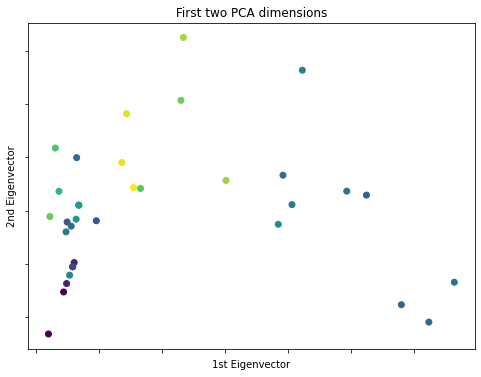

array([[-1.79988987, -2.31336147],
       [-1.56047586, -1.52476729],
       [-1.41682746, -1.05161078],
       [-1.39288606, -0.97275136],
       [-1.51259306, -1.36704845],
       [-1.41682746, -1.05161078],
       [-1.04183531, -0.18824337],
       [-1.32011098,  0.10469843],
       [-1.50464259, -0.21190081],
       [-1.43981799, -0.28959866],
       [-1.35351915,  0.99596756],
       [-1.52205983, -0.3969199 ],
       [-1.46471026, -1.20932961],
       [-1.36146962, -0.15918007],
       [-1.32011098,  0.10469843],
       [-1.63381636,  0.36393065],
       [-1.69116593,  1.17634037],
       [-0.34093924,  0.41890792],
       [-1.77746476, -0.10922586],
       [-0.56100552,  1.8206607 ],
       [-0.63746757,  0.90395846],
       [-0.45104965,  0.43427405],
       [ 0.33816678,  3.25197026],
       [ 1.0129889 ,  0.56875131],
       [ 0.29970424,  2.07251735],
       [ 2.22394813,  2.63729918],
       [ 2.05985562,  0.11490289],
       [ 1.91737255,  0.66703304],
       [ 3.24040527,

In [6]:
pca_analysis(2, X, y)

3
[0.55051557 0.22574901 0.08301379]
[11.44651495  7.32995671  4.4449163 ]


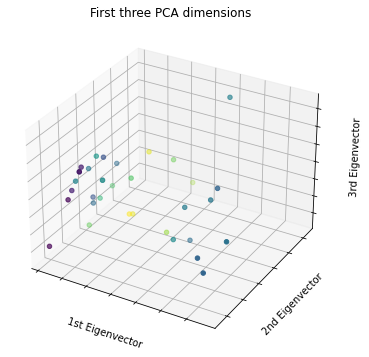

array([[-1.79988987, -2.31336147, -0.89694225],
       [-1.56047586, -1.52476729,  0.15438522],
       [-1.41682746, -1.05161078,  0.7851817 ],
       [-1.39288606, -0.97275136,  0.89031445],
       [-1.51259306, -1.36704845,  0.36465072],
       [-1.41682746, -1.05161078,  0.7851817 ],
       [-1.04183531, -0.18824337,  0.93070547],
       [-1.32011098,  0.10469843,  0.09936361],
       [-1.50464259, -0.21190081, -0.29746663],
       [-1.43981799, -0.28959866, -0.42630013],
       [-1.35351915,  0.99596756,  0.22438705],
       [-1.52205983, -0.3969199 ,  0.5948069 ],
       [-1.46471026, -1.20932961,  0.57491621],
       [-1.36146962, -0.15918007,  0.88650439],
       [-1.32011098,  0.10469843,  0.09936361],
       [-1.63381636,  0.36393065, -0.59297418],
       [-1.69116593,  1.17634037, -0.57308349],
       [-0.34093924,  0.41890792,  0.23100193],
       [-1.77746476, -0.10922586, -1.22377066],
       [-0.56100552,  1.8206607 ,  0.3922914 ],
       [-0.63746757,  0.90395846, -1.081

In [7]:
pca_analysis(3, X, y)

2
[0.55051557 0.22574901]
[11.44651495  7.32995671]


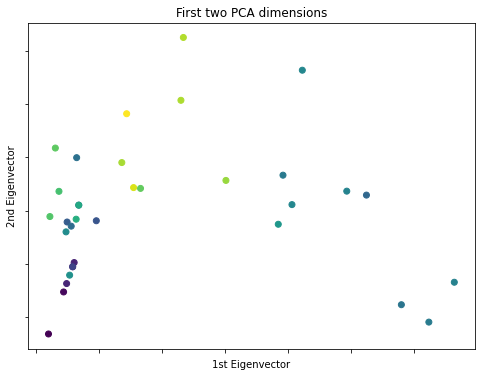

array([[-1.79988987, -2.31336147],
       [-1.56047586, -1.52476729],
       [-1.41682746, -1.05161078],
       [-1.39288606, -0.97275136],
       [-1.51259306, -1.36704845],
       [-1.41682746, -1.05161078],
       [-1.04183531, -0.18824337],
       [-1.32011098,  0.10469843],
       [-1.50464259, -0.21190081],
       [-1.43981799, -0.28959866],
       [-1.35351915,  0.99596756],
       [-1.52205983, -0.3969199 ],
       [-1.46471026, -1.20932961],
       [-1.36146962, -0.15918007],
       [-1.32011098,  0.10469843],
       [-1.63381636,  0.36393065],
       [-1.69116593,  1.17634037],
       [-0.34093924,  0.41890792],
       [-1.77746476, -0.10922586],
       [-0.56100552,  1.8206607 ],
       [-0.63746757,  0.90395846],
       [-0.45104965,  0.43427405],
       [ 0.33816678,  3.25197026],
       [ 1.0129889 ,  0.56875131],
       [ 0.29970424,  2.07251735],
       [ 2.22394813,  2.63729918],
       [ 2.05985562,  0.11490289],
       [ 1.91737255,  0.66703304],
       [ 3.24040527,

In [8]:
pca_analysis(2, X, y1)

2
[0.55051557 0.22574901]
[11.44651495  7.32995671]


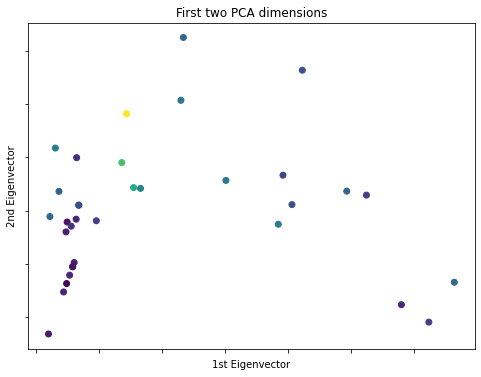

array([[-1.79988987, -2.31336147],
       [-1.56047586, -1.52476729],
       [-1.41682746, -1.05161078],
       [-1.39288606, -0.97275136],
       [-1.51259306, -1.36704845],
       [-1.41682746, -1.05161078],
       [-1.04183531, -0.18824337],
       [-1.32011098,  0.10469843],
       [-1.50464259, -0.21190081],
       [-1.43981799, -0.28959866],
       [-1.35351915,  0.99596756],
       [-1.52205983, -0.3969199 ],
       [-1.46471026, -1.20932961],
       [-1.36146962, -0.15918007],
       [-1.32011098,  0.10469843],
       [-1.63381636,  0.36393065],
       [-1.69116593,  1.17634037],
       [-0.34093924,  0.41890792],
       [-1.77746476, -0.10922586],
       [-0.56100552,  1.8206607 ],
       [-0.63746757,  0.90395846],
       [-0.45104965,  0.43427405],
       [ 0.33816678,  3.25197026],
       [ 1.0129889 ,  0.56875131],
       [ 0.29970424,  2.07251735],
       [ 2.22394813,  2.63729918],
       [ 2.05985562,  0.11490289],
       [ 1.91737255,  0.66703304],
       [ 3.24040527,

In [9]:
pca_analysis(2, X, y2)

2
[0.55051557 0.22574901]
[11.44651495  7.32995671]


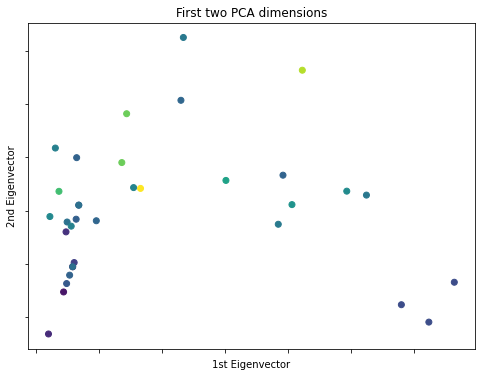

array([[-1.79988987, -2.31336147],
       [-1.56047586, -1.52476729],
       [-1.41682746, -1.05161078],
       [-1.39288606, -0.97275136],
       [-1.51259306, -1.36704845],
       [-1.41682746, -1.05161078],
       [-1.04183531, -0.18824337],
       [-1.32011098,  0.10469843],
       [-1.50464259, -0.21190081],
       [-1.43981799, -0.28959866],
       [-1.35351915,  0.99596756],
       [-1.52205983, -0.3969199 ],
       [-1.46471026, -1.20932961],
       [-1.36146962, -0.15918007],
       [-1.32011098,  0.10469843],
       [-1.63381636,  0.36393065],
       [-1.69116593,  1.17634037],
       [-0.34093924,  0.41890792],
       [-1.77746476, -0.10922586],
       [-0.56100552,  1.8206607 ],
       [-0.63746757,  0.90395846],
       [-0.45104965,  0.43427405],
       [ 0.33816678,  3.25197026],
       [ 1.0129889 ,  0.56875131],
       [ 0.29970424,  2.07251735],
       [ 2.22394813,  2.63729918],
       [ 2.05985562,  0.11490289],
       [ 1.91737255,  0.66703304],
       [ 3.24040527,

In [10]:
pca_analysis(2, X, y3)

2
[0.55051557 0.22574901]
[11.44651495  7.32995671]


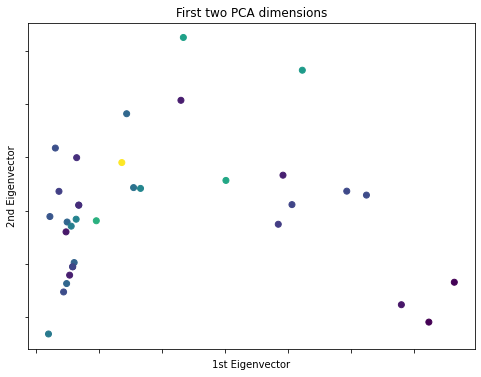

array([[-1.79988987, -2.31336147],
       [-1.56047586, -1.52476729],
       [-1.41682746, -1.05161078],
       [-1.39288606, -0.97275136],
       [-1.51259306, -1.36704845],
       [-1.41682746, -1.05161078],
       [-1.04183531, -0.18824337],
       [-1.32011098,  0.10469843],
       [-1.50464259, -0.21190081],
       [-1.43981799, -0.28959866],
       [-1.35351915,  0.99596756],
       [-1.52205983, -0.3969199 ],
       [-1.46471026, -1.20932961],
       [-1.36146962, -0.15918007],
       [-1.32011098,  0.10469843],
       [-1.63381636,  0.36393065],
       [-1.69116593,  1.17634037],
       [-0.34093924,  0.41890792],
       [-1.77746476, -0.10922586],
       [-0.56100552,  1.8206607 ],
       [-0.63746757,  0.90395846],
       [-0.45104965,  0.43427405],
       [ 0.33816678,  3.25197026],
       [ 1.0129889 ,  0.56875131],
       [ 0.29970424,  2.07251735],
       [ 2.22394813,  2.63729918],
       [ 2.05985562,  0.11490289],
       [ 1.91737255,  0.66703304],
       [ 3.24040527,

In [11]:
pca_analysis(2, X, y4)

2
[0.55051557 0.22574901]
[11.44651495  7.32995671]


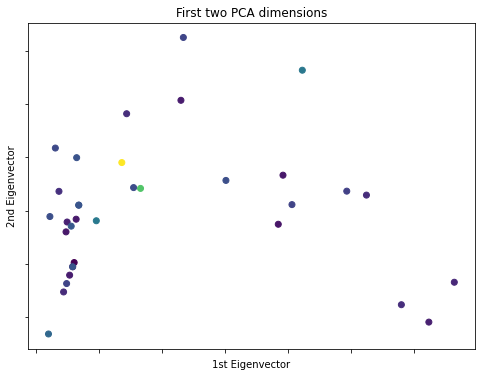

array([[-1.79988987, -2.31336147],
       [-1.56047586, -1.52476729],
       [-1.41682746, -1.05161078],
       [-1.39288606, -0.97275136],
       [-1.51259306, -1.36704845],
       [-1.41682746, -1.05161078],
       [-1.04183531, -0.18824337],
       [-1.32011098,  0.10469843],
       [-1.50464259, -0.21190081],
       [-1.43981799, -0.28959866],
       [-1.35351915,  0.99596756],
       [-1.52205983, -0.3969199 ],
       [-1.46471026, -1.20932961],
       [-1.36146962, -0.15918007],
       [-1.32011098,  0.10469843],
       [-1.63381636,  0.36393065],
       [-1.69116593,  1.17634037],
       [-0.34093924,  0.41890792],
       [-1.77746476, -0.10922586],
       [-0.56100552,  1.8206607 ],
       [-0.63746757,  0.90395846],
       [-0.45104965,  0.43427405],
       [ 0.33816678,  3.25197026],
       [ 1.0129889 ,  0.56875131],
       [ 0.29970424,  2.07251735],
       [ 2.22394813,  2.63729918],
       [ 2.05985562,  0.11490289],
       [ 1.91737255,  0.66703304],
       [ 3.24040527,

In [12]:
pca_analysis(2, X, y5)

In [13]:
time =[]
t_0 = datetime.strptime(data[0][8], '%Y.%m.%d')
for i in range(len(data)):
    t = datetime.strptime(data[i][8], '%Y.%m.%d')
    time.append((t - t_0).days)

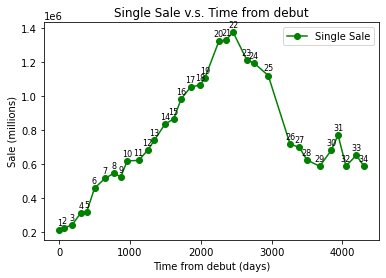

In [14]:
fig, ax = plt.subplots()

ax.plot(time, y, label='Single Sale', marker='o', linestyle='-', color='green')


for i, (t, actual_sale) in enumerate(zip(time, y)):
    ax.annotate(str(i+1), (t, actual_sale), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    
ax.set_xlabel("Time from debut (days)")
ax.set_ylabel("Sale (millions)")
ax.set_title("Single Sale v.s. Time from debut")
ax.legend()
plt.show()

In [15]:
X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(np.array(X), np.array(y), np.array(time), test_size=0.1, random_state=0)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(326, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear') 
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10000, validation_split=0.1)
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/10000
1/1 [==============================] - 1s 866ms/step - loss: 671671058432.0000 - val_loss: 178220613632.0000
Epoch 2/10000
1/1 [==============================] - 0s 39ms/step - loss: 671670861824.0000 - val_loss: 178220548096.0000
Epoch 3/10000
1/1 [==============================] - 0s 38ms/step - loss: 671670730752.0000 - val_loss: 178220466176.0000
Epoch 4/10000
1/1 [==============================] - 0s 37ms/step - loss: 671670468608.0000 - val_loss: 178220384256.0000
Epoch 5/10000
1/1 [==============================] - 0s 40ms/step - loss: 671670403072.0000 - val_loss: 178220302336.0000
Epoch 6/10000
1/1 [==============================] - 0s 35ms/step - loss: 671670272000.0000 - val_loss: 178220236800.0000
Epoch 7/10000
1/1 [==============================] - 0s 35ms/step - loss: 671670075392.0000 - val_loss: 178220138496.0000
Epoch 8/10000
1/1 [==============================] - 0s 43ms/step - loss: 671669944320.0000 - val_loss: 178220056576.0000
Epoch 9/10000
1/1 [====

1/1 [==============================] - 0s 36ms/step - loss: 671612665856.0000 - val_loss: 178178965504.0000
Epoch 68/10000
1/1 [==============================] - 0s 30ms/step - loss: 671598510080.0000 - val_loss: 178176737280.0000
Epoch 69/10000
1/1 [==============================] - 0s 29ms/step - loss: 671605063680.0000 - val_loss: 178174427136.0000
Epoch 70/10000
1/1 [==============================] - 0s 30ms/step - loss: 671597264896.0000 - val_loss: 178172018688.0000
Epoch 71/10000
1/1 [==============================] - 0s 30ms/step - loss: 671589335040.0000 - val_loss: 178169479168.0000
Epoch 72/10000
1/1 [==============================] - 0s 30ms/step - loss: 671586058240.0000 - val_loss: 178166841344.0000
Epoch 73/10000
1/1 [==============================] - 0s 29ms/step - loss: 671581995008.0000 - val_loss: 178164121600.0000
Epoch 74/10000
1/1 [==============================] - 0s 32ms/step - loss: 671576752128.0000 - val_loss: 178161205248.0000
Epoch 75/10000
1/1 [===========

1/1 [==============================] - 0s 33ms/step - loss: 670629953536.0000 - val_loss: 177574297600.0000
Epoch 134/10000
1/1 [==============================] - 0s 32ms/step - loss: 670440226816.0000 - val_loss: 177552769024.0000
Epoch 135/10000
1/1 [==============================] - 0s 33ms/step - loss: 670481842176.0000 - val_loss: 177530683392.0000
Epoch 136/10000
1/1 [==============================] - 0s 32ms/step - loss: 670410342400.0000 - val_loss: 177507942400.0000
Epoch 137/10000
1/1 [==============================] - 0s 33ms/step - loss: 670393106432.0000 - val_loss: 177484611584.0000
Epoch 138/10000
1/1 [==============================] - 0s 29ms/step - loss: 670217535488.0000 - val_loss: 177460461568.0000
Epoch 139/10000
1/1 [==============================] - 0s 32ms/step - loss: 670165565440.0000 - val_loss: 177435492352.0000
Epoch 140/10000
1/1 [==============================] - 0s 30ms/step - loss: 670129717248.0000 - val_loss: 177409835008.0000
Epoch 141/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 664054923264.0000 - val_loss: 174297219072.0000
Epoch 200/10000
1/1 [==============================] - 0s 31ms/step - loss: 663719182336.0000 - val_loss: 174208385024.0000
Epoch 201/10000
1/1 [==============================] - 0s 33ms/step - loss: 663799005184.0000 - val_loss: 174118354944.0000
Epoch 202/10000
1/1 [==============================] - 0s 31ms/step - loss: 663314169856.0000 - val_loss: 174026604544.0000
Epoch 203/10000
1/1 [==============================] - 0s 26ms/step - loss: 663248109568.0000 - val_loss: 173933281280.0000
Epoch 204/10000
1/1 [==============================] - 0s 32ms/step - loss: 662781952000.0000 - val_loss: 173838123008.0000
Epoch 205/10000
1/1 [==============================] - 0s 28ms/step - loss: 663542104064.0000 - val_loss: 173742211072.0000
Epoch 206/10000
1/1 [==============================] - 0s 33ms/step - loss: 662848798720.0000 - val_loss: 173645135872.0000
Epoch 207/10000
1/1 [===

1/1 [==============================] - 0s 42ms/step - loss: 641798242304.0000 - val_loss: 164198137856.0000
Epoch 266/10000
1/1 [==============================] - 0s 33ms/step - loss: 639202623488.0000 - val_loss: 163960897536.0000
Epoch 267/10000
1/1 [==============================] - 0s 34ms/step - loss: 640933560320.0000 - val_loss: 163721183232.0000
Epoch 268/10000
1/1 [==============================] - 0s 34ms/step - loss: 639591317504.0000 - val_loss: 163478290432.0000
Epoch 269/10000
1/1 [==============================] - 0s 34ms/step - loss: 642666201088.0000 - val_loss: 163234840576.0000
Epoch 270/10000
1/1 [==============================] - 0s 33ms/step - loss: 639153733632.0000 - val_loss: 162988179456.0000
Epoch 271/10000
1/1 [==============================] - 0s 35ms/step - loss: 638812160000.0000 - val_loss: 162739339264.0000
Epoch 272/10000
1/1 [==============================] - 0s 35ms/step - loss: 637436887040.0000 - val_loss: 162486894592.0000
Epoch 273/10000
1/1 [===

1/1 [==============================] - 0s 37ms/step - loss: 591651930112.0000 - val_loss: 142103281664.0000
Epoch 332/10000
1/1 [==============================] - 0s 34ms/step - loss: 590794522624.0000 - val_loss: 141657391104.0000
Epoch 333/10000
1/1 [==============================] - 0s 35ms/step - loss: 592127983616.0000 - val_loss: 141209714688.0000
Epoch 334/10000
1/1 [==============================] - 0s 33ms/step - loss: 589367279616.0000 - val_loss: 140756008960.0000
Epoch 335/10000
1/1 [==============================] - 0s 33ms/step - loss: 585806184448.0000 - val_loss: 140297355264.0000
Epoch 336/10000
1/1 [==============================] - 0s 34ms/step - loss: 583620886528.0000 - val_loss: 139833294848.0000
Epoch 337/10000
1/1 [==============================] - 0s 36ms/step - loss: 585942958080.0000 - val_loss: 139365728256.0000
Epoch 338/10000
1/1 [==============================] - 0s 34ms/step - loss: 582650626048.0000 - val_loss: 138894917632.0000
Epoch 339/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 506068008960.0000 - val_loss: 105770786816.0000
Epoch 398/10000
1/1 [==============================] - 0s 29ms/step - loss: 505509347328.0000 - val_loss: 105124962304.0000
Epoch 399/10000
1/1 [==============================] - 0s 32ms/step - loss: 511914115072.0000 - val_loss: 104478998528.0000
Epoch 400/10000
1/1 [==============================] - 0s 29ms/step - loss: 510804164608.0000 - val_loss: 103834050560.0000
Epoch 401/10000
1/1 [==============================] - 0s 30ms/step - loss: 510325587968.0000 - val_loss: 103188029440.0000
Epoch 402/10000
1/1 [==============================] - 0s 29ms/step - loss: 496464330752.0000 - val_loss: 102537043968.0000
Epoch 403/10000
1/1 [==============================] - 0s 30ms/step - loss: 499861815296.0000 - val_loss: 101884846080.0000
Epoch 404/10000
1/1 [==============================] - 0s 29ms/step - loss: 498203328512.0000 - val_loss: 101231992832.0000
Epoch 405/10000
1/1 [===

1/1 [==============================] - 0s 27ms/step - loss: 396757467136.0000 - val_loss: 60991881216.0000
Epoch 464/10000
1/1 [==============================] - 0s 27ms/step - loss: 403512623104.0000 - val_loss: 60322361344.0000
Epoch 465/10000
1/1 [==============================] - 0s 33ms/step - loss: 387912040448.0000 - val_loss: 59653050368.0000
Epoch 466/10000
1/1 [==============================] - 0s 33ms/step - loss: 392411086848.0000 - val_loss: 58987413504.0000
Epoch 467/10000
1/1 [==============================] - 0s 32ms/step - loss: 389973508096.0000 - val_loss: 58322833408.0000
Epoch 468/10000
1/1 [==============================] - 0s 32ms/step - loss: 393810411520.0000 - val_loss: 57663803392.0000
Epoch 469/10000
1/1 [==============================] - 0s 39ms/step - loss: 402657443840.0000 - val_loss: 57009606656.0000
Epoch 470/10000
1/1 [==============================] - 0s 35ms/step - loss: 391438204928.0000 - val_loss: 56355373056.0000
Epoch 471/10000
1/1 [===========

Epoch 530/10000
1/1 [==============================] - 0s 29ms/step - loss: 259030564864.0000 - val_loss: 22176860160.0000
Epoch 531/10000
1/1 [==============================] - 0s 29ms/step - loss: 250112671744.0000 - val_loss: 21732069376.0000
Epoch 532/10000
1/1 [==============================] - 0s 31ms/step - loss: 282019463168.0000 - val_loss: 21289318400.0000
Epoch 533/10000
1/1 [==============================] - 0s 36ms/step - loss: 270810103808.0000 - val_loss: 20857559040.0000
Epoch 534/10000
1/1 [==============================] - 0s 32ms/step - loss: 271765028864.0000 - val_loss: 20435707904.0000
Epoch 535/10000
1/1 [==============================] - 0s 33ms/step - loss: 283107229696.0000 - val_loss: 20020008960.0000
Epoch 536/10000
1/1 [==============================] - 0s 29ms/step - loss: 272617390080.0000 - val_loss: 19606046720.0000
Epoch 537/10000
1/1 [==============================] - 0s 26ms/step - loss: 286832689152.0000 - val_loss: 19192412160.0000
Epoch 538/10000


Epoch 597/10000
1/1 [==============================] - 0s 31ms/step - loss: 188787474432.0000 - val_loss: 3753794560.0000
Epoch 598/10000
1/1 [==============================] - 0s 30ms/step - loss: 170013868032.0000 - val_loss: 3646679040.0000
Epoch 599/10000
1/1 [==============================] - 0s 31ms/step - loss: 207629549568.0000 - val_loss: 3544288256.0000
Epoch 600/10000
1/1 [==============================] - 0s 31ms/step - loss: 178189942784.0000 - val_loss: 3446283520.0000
Epoch 601/10000
1/1 [==============================] - 0s 28ms/step - loss: 176766386176.0000 - val_loss: 3349884928.0000
Epoch 602/10000
1/1 [==============================] - 0s 29ms/step - loss: 198175014912.0000 - val_loss: 3252906240.0000
Epoch 603/10000
1/1 [==============================] - 0s 33ms/step - loss: 188292792320.0000 - val_loss: 3162448896.0000
Epoch 604/10000
1/1 [==============================] - 0s 29ms/step - loss: 163172089856.0000 - val_loss: 3075042048.0000
Epoch 605/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 106217480192.0000 - val_loss: 4354139136.0000
Epoch 665/10000
1/1 [==============================] - 0s 29ms/step - loss: 116469997568.0000 - val_loss: 4448466944.0000
Epoch 666/10000
1/1 [==============================] - 0s 29ms/step - loss: 111872991232.0000 - val_loss: 4547913728.0000
Epoch 667/10000
1/1 [==============================] - 0s 30ms/step - loss: 140108021760.0000 - val_loss: 4644872192.0000
Epoch 668/10000
1/1 [==============================] - 0s 35ms/step - loss: 125839269888.0000 - val_loss: 4741523968.0000
Epoch 669/10000
1/1 [==============================] - 0s 30ms/step - loss: 113905311744.0000 - val_loss: 4841511936.0000
Epoch 670/10000
1/1 [==============================] - 0s 31ms/step - loss: 108523102208.0000 - val_loss: 4946157568.0000
Epoch 671/10000
1/1 [==============================] - 0s 32ms/step - loss: 105846005760.0000 - val_loss: 5052615168.0000
Epoch 672/10000
1/1 [===================

1/1 [==============================] - 0s 33ms/step - loss: 111489024000.0000 - val_loss: 12562927616.0000
Epoch 732/10000
1/1 [==============================] - 0s 35ms/step - loss: 95098363904.0000 - val_loss: 12700950528.0000
Epoch 733/10000
1/1 [==============================] - 0s 33ms/step - loss: 103765860352.0000 - val_loss: 12834913280.0000
Epoch 734/10000
1/1 [==============================] - 0s 33ms/step - loss: 106096656384.0000 - val_loss: 12965442560.0000
Epoch 735/10000
1/1 [==============================] - 0s 33ms/step - loss: 90271473664.0000 - val_loss: 13095002112.0000
Epoch 736/10000
1/1 [==============================] - 0s 62ms/step - loss: 94371749888.0000 - val_loss: 13225268224.0000
Epoch 737/10000
1/1 [==============================] - 0s 34ms/step - loss: 114217705472.0000 - val_loss: 13346111488.0000
Epoch 738/10000
1/1 [==============================] - 0s 53ms/step - loss: 101471961088.0000 - val_loss: 13465198592.0000
Epoch 739/10000
1/1 [==============

1/1 [==============================] - 0s 34ms/step - loss: 128507011072.0000 - val_loss: 20660733952.0000
Epoch 799/10000
1/1 [==============================] - 0s 29ms/step - loss: 102311690240.0000 - val_loss: 20724604928.0000
Epoch 800/10000
1/1 [==============================] - 0s 28ms/step - loss: 96972062720.0000 - val_loss: 20783605760.0000
Epoch 801/10000
1/1 [==============================] - 0s 31ms/step - loss: 69794390016.0000 - val_loss: 20853741568.0000
Epoch 802/10000
1/1 [==============================] - 0s 31ms/step - loss: 99807797248.0000 - val_loss: 20919926784.0000
Epoch 803/10000
1/1 [==============================] - 0s 32ms/step - loss: 87441178624.0000 - val_loss: 20982063104.0000
Epoch 804/10000
1/1 [==============================] - 0s 32ms/step - loss: 86442180608.0000 - val_loss: 21056806912.0000
Epoch 805/10000
1/1 [==============================] - 0s 32ms/step - loss: 88263254016.0000 - val_loss: 21121900544.0000
Epoch 806/10000
1/1 [=================

1/1 [==============================] - 0s 34ms/step - loss: 70744375296.0000 - val_loss: 27390887936.0000
Epoch 866/10000
1/1 [==============================] - 0s 34ms/step - loss: 64340250624.0000 - val_loss: 27511523328.0000
Epoch 867/10000
1/1 [==============================] - 0s 33ms/step - loss: 75090247680.0000 - val_loss: 27614296064.0000
Epoch 868/10000
1/1 [==============================] - 0s 30ms/step - loss: 97321000960.0000 - val_loss: 27705600000.0000
Epoch 869/10000
1/1 [==============================] - 0s 34ms/step - loss: 75985371136.0000 - val_loss: 27795695616.0000
Epoch 870/10000
1/1 [==============================] - 0s 33ms/step - loss: 87680368640.0000 - val_loss: 27890399232.0000
Epoch 871/10000
1/1 [==============================] - 0s 31ms/step - loss: 63318515712.0000 - val_loss: 27984717824.0000
Epoch 872/10000
1/1 [==============================] - 0s 31ms/step - loss: 66556162048.0000 - val_loss: 28078170112.0000
Epoch 873/10000
1/1 [===================

1/1 [==============================] - 0s 27ms/step - loss: 76475752448.0000 - val_loss: 33976612864.0000
Epoch 933/10000
1/1 [==============================] - 0s 30ms/step - loss: 95152119808.0000 - val_loss: 34055260160.0000
Epoch 934/10000
1/1 [==============================] - 0s 27ms/step - loss: 58702929920.0000 - val_loss: 34134345728.0000
Epoch 935/10000
1/1 [==============================] - 0s 30ms/step - loss: 110153752576.0000 - val_loss: 34188900352.0000
Epoch 936/10000
1/1 [==============================] - 0s 31ms/step - loss: 85049696256.0000 - val_loss: 34237859840.0000
Epoch 937/10000
1/1 [==============================] - 0s 30ms/step - loss: 62487494656.0000 - val_loss: 34268555264.0000
Epoch 938/10000
1/1 [==============================] - 0s 34ms/step - loss: 105197142016.0000 - val_loss: 34317443072.0000
Epoch 939/10000
1/1 [==============================] - 0s 32ms/step - loss: 80645914624.0000 - val_loss: 34358728704.0000
Epoch 940/10000
1/1 [=================

1/1 [==============================] - 0s 42ms/step - loss: 51032367104.0000 - val_loss: 39108546560.0000
Epoch 1000/10000
1/1 [==============================] - 0s 30ms/step - loss: 118319431680.0000 - val_loss: 39218900992.0000
Epoch 1001/10000
1/1 [==============================] - 0s 30ms/step - loss: 66352869376.0000 - val_loss: 39336300544.0000
Epoch 1002/10000
1/1 [==============================] - 0s 26ms/step - loss: 95953846272.0000 - val_loss: 39440076800.0000
Epoch 1003/10000
1/1 [==============================] - 0s 31ms/step - loss: 57917177856.0000 - val_loss: 39541391360.0000
Epoch 1004/10000
1/1 [==============================] - 0s 31ms/step - loss: 69522759680.0000 - val_loss: 39670992896.0000
Epoch 1005/10000
1/1 [==============================] - 0s 32ms/step - loss: 67451805696.0000 - val_loss: 39773171712.0000
Epoch 1006/10000
1/1 [==============================] - 0s 34ms/step - loss: 85787156480.0000 - val_loss: 39881338880.0000
Epoch 1007/10000
1/1 [==========

1/1 [==============================] - 0s 32ms/step - loss: 80758276096.0000 - val_loss: 45334609920.0000
Epoch 1066/10000
1/1 [==============================] - 0s 29ms/step - loss: 92015280128.0000 - val_loss: 45467226112.0000
Epoch 1067/10000
1/1 [==============================] - 0s 27ms/step - loss: 80125526016.0000 - val_loss: 45590032384.0000
Epoch 1068/10000
1/1 [==============================] - 0s 33ms/step - loss: 94250082304.0000 - val_loss: 45714083840.0000
Epoch 1069/10000
1/1 [==============================] - 0s 27ms/step - loss: 129030045696.0000 - val_loss: 45832417280.0000
Epoch 1070/10000
1/1 [==============================] - 0s 35ms/step - loss: 70988161024.0000 - val_loss: 45912903680.0000
Epoch 1071/10000
1/1 [==============================] - 0s 29ms/step - loss: 79312273408.0000 - val_loss: 45974335488.0000
Epoch 1072/10000
1/1 [==============================] - 0s 29ms/step - loss: 66175913984.0000 - val_loss: 46038323200.0000
Epoch 1073/10000
1/1 [==========

Epoch 1132/10000
1/1 [==============================] - 0s 30ms/step - loss: 66529673216.0000 - val_loss: 51006091264.0000
Epoch 1133/10000
1/1 [==============================] - 0s 28ms/step - loss: 63903854592.0000 - val_loss: 51137007616.0000
Epoch 1134/10000
1/1 [==============================] - 0s 31ms/step - loss: 55346122752.0000 - val_loss: 51278303232.0000
Epoch 1135/10000
1/1 [==============================] - 0s 31ms/step - loss: 86213124096.0000 - val_loss: 51420950528.0000
Epoch 1136/10000
1/1 [==============================] - 0s 29ms/step - loss: 65585143808.0000 - val_loss: 51530858496.0000
Epoch 1137/10000
1/1 [==============================] - 0s 29ms/step - loss: 62233817088.0000 - val_loss: 51638194176.0000
Epoch 1138/10000
1/1 [==============================] - 0s 31ms/step - loss: 62405083136.0000 - val_loss: 51782565888.0000
Epoch 1139/10000
1/1 [==============================] - 0s 31ms/step - loss: 96889217024.0000 - val_loss: 51904442368.0000
Epoch 1140/10000

1/1 [==============================] - 0s 34ms/step - loss: 57173585920.0000 - val_loss: 57773232128.0000
Epoch 1199/10000
1/1 [==============================] - 0s 35ms/step - loss: 61824401408.0000 - val_loss: 57815519232.0000
Epoch 1200/10000
1/1 [==============================] - 0s 30ms/step - loss: 54370603008.0000 - val_loss: 57831247872.0000
Epoch 1201/10000
1/1 [==============================] - 0s 29ms/step - loss: 65106771968.0000 - val_loss: 57818337280.0000
Epoch 1202/10000
1/1 [==============================] - 0s 30ms/step - loss: 63477084160.0000 - val_loss: 57827192832.0000
Epoch 1203/10000
1/1 [==============================] - 0s 30ms/step - loss: 63845961728.0000 - val_loss: 57841897472.0000
Epoch 1204/10000
1/1 [==============================] - 0s 28ms/step - loss: 99412074496.0000 - val_loss: 57818861568.0000
Epoch 1205/10000
1/1 [==============================] - 0s 30ms/step - loss: 80614187008.0000 - val_loss: 57768558592.0000
Epoch 1206/10000
1/1 [===========

Epoch 1265/10000
1/1 [==============================] - 0s 30ms/step - loss: 82878750720.0000 - val_loss: 63921307648.0000
Epoch 1266/10000
1/1 [==============================] - 0s 32ms/step - loss: 78021902336.0000 - val_loss: 63966859264.0000
Epoch 1267/10000
1/1 [==============================] - 0s 32ms/step - loss: 67613945856.0000 - val_loss: 64061837312.0000
Epoch 1268/10000
1/1 [==============================] - 0s 31ms/step - loss: 63679729664.0000 - val_loss: 64149442560.0000
Epoch 1269/10000
1/1 [==============================] - 0s 31ms/step - loss: 57256230912.0000 - val_loss: 64238583808.0000
Epoch 1270/10000
1/1 [==============================] - 0s 31ms/step - loss: 54176989184.0000 - val_loss: 64318853120.0000
Epoch 1271/10000
1/1 [==============================] - 0s 30ms/step - loss: 61300350976.0000 - val_loss: 64381431808.0000
Epoch 1272/10000
1/1 [==============================] - 0s 29ms/step - loss: 96263159808.0000 - val_loss: 64407142400.0000
Epoch 1273/10000

1/1 [==============================] - 0s 30ms/step - loss: 64922292224.0000 - val_loss: 67027054592.0000
Epoch 1332/10000
1/1 [==============================] - 0s 30ms/step - loss: 71306076160.0000 - val_loss: 67111354368.0000
Epoch 1333/10000
1/1 [==============================] - 0s 29ms/step - loss: 43719421952.0000 - val_loss: 67176054784.0000
Epoch 1334/10000
1/1 [==============================] - 0s 33ms/step - loss: 73544081408.0000 - val_loss: 67227910144.0000
Epoch 1335/10000
1/1 [==============================] - 0s 31ms/step - loss: 55594741760.0000 - val_loss: 67317731328.0000
Epoch 1336/10000
1/1 [==============================] - 0s 31ms/step - loss: 33620135936.0000 - val_loss: 67418730496.0000
Epoch 1337/10000
1/1 [==============================] - 0s 31ms/step - loss: 73190350848.0000 - val_loss: 67517984768.0000
Epoch 1338/10000
1/1 [==============================] - 0s 29ms/step - loss: 56602529792.0000 - val_loss: 67674804224.0000
Epoch 1339/10000
1/1 [===========

Epoch 1398/10000
1/1 [==============================] - 0s 31ms/step - loss: 72886378496.0000 - val_loss: 73980960768.0000
Epoch 1399/10000
1/1 [==============================] - 0s 30ms/step - loss: 62941921280.0000 - val_loss: 73965469696.0000
Epoch 1400/10000
1/1 [==============================] - 0s 30ms/step - loss: 78704680960.0000 - val_loss: 73944825856.0000
Epoch 1401/10000
1/1 [==============================] - 0s 29ms/step - loss: 54283128832.0000 - val_loss: 73949413376.0000
Epoch 1402/10000
1/1 [==============================] - 0s 32ms/step - loss: 45388996608.0000 - val_loss: 73936945152.0000
Epoch 1403/10000
1/1 [==============================] - 0s 30ms/step - loss: 46007066624.0000 - val_loss: 73946103808.0000
Epoch 1404/10000
1/1 [==============================] - 0s 30ms/step - loss: 48491606016.0000 - val_loss: 73952100352.0000
Epoch 1405/10000
1/1 [==============================] - 0s 30ms/step - loss: 32266827776.0000 - val_loss: 73943515136.0000
Epoch 1406/10000

1/1 [==============================] - 0s 31ms/step - loss: 41580314624.0000 - val_loss: 77974249472.0000
Epoch 1465/10000
1/1 [==============================] - 0s 32ms/step - loss: 43031277568.0000 - val_loss: 78018093056.0000
Epoch 1466/10000
1/1 [==============================] - 0s 37ms/step - loss: 94496759808.0000 - val_loss: 78054842368.0000
Epoch 1467/10000
1/1 [==============================] - 0s 35ms/step - loss: 43266457600.0000 - val_loss: 78079991808.0000
Epoch 1468/10000
1/1 [==============================] - 0s 32ms/step - loss: 64017268736.0000 - val_loss: 78079139840.0000
Epoch 1469/10000
1/1 [==============================] - 0s 30ms/step - loss: 44692303872.0000 - val_loss: 78088855552.0000
Epoch 1470/10000
1/1 [==============================] - 0s 30ms/step - loss: 49182949376.0000 - val_loss: 78082498560.0000
Epoch 1471/10000
1/1 [==============================] - 0s 31ms/step - loss: 61709590528.0000 - val_loss: 78066016256.0000
Epoch 1472/10000
1/1 [===========

Epoch 1531/10000
1/1 [==============================] - 0s 29ms/step - loss: 69277876224.0000 - val_loss: 81353613312.0000
Epoch 1532/10000
1/1 [==============================] - 0s 32ms/step - loss: 49318162432.0000 - val_loss: 81564401664.0000
Epoch 1533/10000
1/1 [==============================] - 0s 28ms/step - loss: 48744480768.0000 - val_loss: 81786593280.0000
Epoch 1534/10000
1/1 [==============================] - 0s 26ms/step - loss: 55074566144.0000 - val_loss: 82013913088.0000
Epoch 1535/10000
1/1 [==============================] - 0s 30ms/step - loss: 60628561920.0000 - val_loss: 82278752256.0000
Epoch 1536/10000
1/1 [==============================] - 0s 33ms/step - loss: 65506316288.0000 - val_loss: 82524176384.0000
Epoch 1537/10000
1/1 [==============================] - 0s 39ms/step - loss: 57228017664.0000 - val_loss: 82784477184.0000
Epoch 1538/10000
1/1 [==============================] - 0s 32ms/step - loss: 74544963584.0000 - val_loss: 83045605376.0000
Epoch 1539/10000

1/1 [==============================] - 0s 31ms/step - loss: 39614427136.0000 - val_loss: 88938012672.0000
Epoch 1598/10000
1/1 [==============================] - 0s 30ms/step - loss: 92608626688.0000 - val_loss: 88729411584.0000
Epoch 1599/10000
1/1 [==============================] - 0s 32ms/step - loss: 60085583872.0000 - val_loss: 88573353984.0000
Epoch 1600/10000
1/1 [==============================] - 0s 31ms/step - loss: 60910841856.0000 - val_loss: 88428208128.0000
Epoch 1601/10000
1/1 [==============================] - 0s 29ms/step - loss: 63391088640.0000 - val_loss: 88282488832.0000
Epoch 1602/10000
1/1 [==============================] - 0s 30ms/step - loss: 46559387648.0000 - val_loss: 88124858368.0000
Epoch 1603/10000
1/1 [==============================] - 0s 31ms/step - loss: 48325459968.0000 - val_loss: 87950123008.0000
Epoch 1604/10000
1/1 [==============================] - 0s 30ms/step - loss: 59365572608.0000 - val_loss: 87720173568.0000
Epoch 1605/10000
1/1 [===========

Epoch 1664/10000
1/1 [==============================] - 0s 34ms/step - loss: 41027317760.0000 - val_loss: 92839804928.0000
Epoch 1665/10000
1/1 [==============================] - 0s 33ms/step - loss: 53004865536.0000 - val_loss: 92931530752.0000
Epoch 1666/10000
1/1 [==============================] - 0s 31ms/step - loss: 46902460416.0000 - val_loss: 92990939136.0000
Epoch 1667/10000
1/1 [==============================] - 0s 30ms/step - loss: 31970793472.0000 - val_loss: 93061775360.0000
Epoch 1668/10000
1/1 [==============================] - 0s 30ms/step - loss: 90880114688.0000 - val_loss: 93149208576.0000
Epoch 1669/10000
1/1 [==============================] - 0s 29ms/step - loss: 60638371840.0000 - val_loss: 93167321088.0000
Epoch 1670/10000
1/1 [==============================] - 0s 29ms/step - loss: 47740624896.0000 - val_loss: 93205995520.0000
Epoch 1671/10000
1/1 [==============================] - 0s 28ms/step - loss: 47850184704.0000 - val_loss: 93231833088.0000
Epoch 1672/10000

1/1 [==============================] - 0s 31ms/step - loss: 80152453120.0000 - val_loss: 98237456384.0000
Epoch 1731/10000
1/1 [==============================] - 0s 30ms/step - loss: 37530185728.0000 - val_loss: 98167947264.0000
Epoch 1732/10000
1/1 [==============================] - 0s 31ms/step - loss: 63993253888.0000 - val_loss: 98115518464.0000
Epoch 1733/10000
1/1 [==============================] - 0s 32ms/step - loss: 45471436800.0000 - val_loss: 98032771072.0000
Epoch 1734/10000
1/1 [==============================] - 0s 32ms/step - loss: 45059612672.0000 - val_loss: 97910685696.0000
Epoch 1735/10000
1/1 [==============================] - 0s 28ms/step - loss: 50258698240.0000 - val_loss: 97820278784.0000
Epoch 1736/10000
1/1 [==============================] - 0s 37ms/step - loss: 54324256768.0000 - val_loss: 97706967040.0000
Epoch 1737/10000
1/1 [==============================] - 0s 33ms/step - loss: 64579223552.0000 - val_loss: 97601323008.0000
Epoch 1738/10000
1/1 [===========

Epoch 1797/10000
1/1 [==============================] - 0s 35ms/step - loss: 28386926592.0000 - val_loss: 98007810048.0000
Epoch 1798/10000
1/1 [==============================] - 0s 37ms/step - loss: 68876492800.0000 - val_loss: 98087895040.0000
Epoch 1799/10000
1/1 [==============================] - 0s 28ms/step - loss: 68322975744.0000 - val_loss: 98250711040.0000
Epoch 1800/10000
1/1 [==============================] - 0s 37ms/step - loss: 52131041280.0000 - val_loss: 98425167872.0000
Epoch 1801/10000
1/1 [==============================] - 0s 29ms/step - loss: 56737497088.0000 - val_loss: 98610053120.0000
Epoch 1802/10000
1/1 [==============================] - 0s 27ms/step - loss: 61327175680.0000 - val_loss: 98788466688.0000
Epoch 1803/10000
1/1 [==============================] - 0s 61ms/step - loss: 41974419456.0000 - val_loss: 98982354944.0000
Epoch 1804/10000
1/1 [==============================] - 0s 30ms/step - loss: 39590486016.0000 - val_loss: 99190136832.0000
Epoch 1805/10000

1/1 [==============================] - 0s 32ms/step - loss: 42666811392.0000 - val_loss: 106583089152.0000
Epoch 1864/10000
1/1 [==============================] - 0s 33ms/step - loss: 47985225728.0000 - val_loss: 106709409792.0000
Epoch 1865/10000
1/1 [==============================] - 0s 30ms/step - loss: 59215941632.0000 - val_loss: 106832068608.0000
Epoch 1866/10000
1/1 [==============================] - 0s 32ms/step - loss: 36252368896.0000 - val_loss: 107021180928.0000
Epoch 1867/10000
1/1 [==============================] - 0s 31ms/step - loss: 44654948352.0000 - val_loss: 107202715648.0000
Epoch 1868/10000
1/1 [==============================] - 0s 34ms/step - loss: 40750432256.0000 - val_loss: 107403649024.0000
Epoch 1869/10000
1/1 [==============================] - 0s 34ms/step - loss: 66579066880.0000 - val_loss: 107569799168.0000
Epoch 1870/10000
1/1 [==============================] - 0s 35ms/step - loss: 40730750976.0000 - val_loss: 107691155456.0000
Epoch 1871/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 50343780352.0000 - val_loss: 107457576960.0000
Epoch 1930/10000
1/1 [==============================] - 0s 32ms/step - loss: 62900948992.0000 - val_loss: 107485880320.0000
Epoch 1931/10000
1/1 [==============================] - 0s 31ms/step - loss: 55718006784.0000 - val_loss: 107555135488.0000
Epoch 1932/10000
1/1 [==============================] - 0s 33ms/step - loss: 48573313024.0000 - val_loss: 107541094400.0000
Epoch 1933/10000
1/1 [==============================] - 0s 36ms/step - loss: 86163693568.0000 - val_loss: 107510005760.0000
Epoch 1934/10000
1/1 [==============================] - 0s 30ms/step - loss: 63744593920.0000 - val_loss: 107483521024.0000
Epoch 1935/10000
1/1 [==============================] - 0s 35ms/step - loss: 67806158848.0000 - val_loss: 107439063040.0000
Epoch 1936/10000
1/1 [==============================] - 0s 31ms/step - loss: 41647890432.0000 - val_loss: 107436744704.0000
Epoch 1937/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 63766261760.0000 - val_loss: 113490698240.0000
Epoch 1996/10000
1/1 [==============================] - 0s 31ms/step - loss: 54063296512.0000 - val_loss: 113403273216.0000
Epoch 1997/10000
1/1 [==============================] - 0s 28ms/step - loss: 65192112128.0000 - val_loss: 113352122368.0000
Epoch 1998/10000
1/1 [==============================] - 0s 29ms/step - loss: 47073390592.0000 - val_loss: 113276682240.0000
Epoch 1999/10000
1/1 [==============================] - 0s 29ms/step - loss: 56257757184.0000 - val_loss: 113253687296.0000
Epoch 2000/10000
1/1 [==============================] - 0s 30ms/step - loss: 59199029248.0000 - val_loss: 113183793152.0000
Epoch 2001/10000
1/1 [==============================] - 0s 30ms/step - loss: 48780787712.0000 - val_loss: 113106747392.0000
Epoch 2002/10000
1/1 [==============================] - 0s 31ms/step - loss: 89052348416.0000 - val_loss: 112932708352.0000
Epoch 2003/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 51588632576.0000 - val_loss: 118987227136.0000
Epoch 2062/10000
1/1 [==============================] - 0s 32ms/step - loss: 71140114432.0000 - val_loss: 118972473344.0000
Epoch 2063/10000
1/1 [==============================] - 0s 37ms/step - loss: 39624241152.0000 - val_loss: 119046430720.0000
Epoch 2064/10000
1/1 [==============================] - 0s 32ms/step - loss: 39693873152.0000 - val_loss: 119048921088.0000
Epoch 2065/10000
1/1 [==============================] - 0s 33ms/step - loss: 28501082112.0000 - val_loss: 119036706816.0000
Epoch 2066/10000
1/1 [==============================] - 0s 30ms/step - loss: 67419738112.0000 - val_loss: 119062454272.0000
Epoch 2067/10000
1/1 [==============================] - 0s 31ms/step - loss: 41088266240.0000 - val_loss: 119080591360.0000
Epoch 2068/10000
1/1 [==============================] - 0s 45ms/step - loss: 36838850560.0000 - val_loss: 119110524928.0000
Epoch 2069/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 63600402432.0000 - val_loss: 118100131840.0000
Epoch 2128/10000
1/1 [==============================] - 0s 30ms/step - loss: 62897807360.0000 - val_loss: 117957222400.0000
Epoch 2129/10000
1/1 [==============================] - 0s 29ms/step - loss: 75185307648.0000 - val_loss: 117734301696.0000
Epoch 2130/10000
1/1 [==============================] - 0s 29ms/step - loss: 55438196736.0000 - val_loss: 117529944064.0000
Epoch 2131/10000
1/1 [==============================] - 0s 29ms/step - loss: 53778919424.0000 - val_loss: 117282283520.0000
Epoch 2132/10000
1/1 [==============================] - 0s 29ms/step - loss: 71324131328.0000 - val_loss: 117118623744.0000
Epoch 2133/10000
1/1 [==============================] - 0s 29ms/step - loss: 54866915328.0000 - val_loss: 117033377792.0000
Epoch 2134/10000
1/1 [==============================] - 0s 27ms/step - loss: 41618264064.0000 - val_loss: 117032378368.0000
Epoch 2135/10000
1/1 [===

1/1 [==============================] - 0s 28ms/step - loss: 51565182976.0000 - val_loss: 123289493504.0000
Epoch 2194/10000
1/1 [==============================] - 0s 29ms/step - loss: 50289860608.0000 - val_loss: 123215978496.0000
Epoch 2195/10000
1/1 [==============================] - 0s 27ms/step - loss: 40291536896.0000 - val_loss: 123144019968.0000
Epoch 2196/10000
1/1 [==============================] - 0s 29ms/step - loss: 41700421632.0000 - val_loss: 123074609152.0000
Epoch 2197/10000
1/1 [==============================] - 0s 44ms/step - loss: 51292692480.0000 - val_loss: 123003379712.0000
Epoch 2198/10000
1/1 [==============================] - 0s 32ms/step - loss: 49785446400.0000 - val_loss: 122947526656.0000
Epoch 2199/10000
1/1 [==============================] - 0s 30ms/step - loss: 34165172224.0000 - val_loss: 122897760256.0000
Epoch 2200/10000
1/1 [==============================] - 0s 30ms/step - loss: 38836502528.0000 - val_loss: 122898325504.0000
Epoch 2201/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 59597443072.0000 - val_loss: 130081792000.0000
Epoch 2260/10000
1/1 [==============================] - 0s 29ms/step - loss: 46978347008.0000 - val_loss: 130266603520.0000
Epoch 2261/10000
1/1 [==============================] - 0s 27ms/step - loss: 44100259840.0000 - val_loss: 130489442304.0000
Epoch 2262/10000
1/1 [==============================] - 0s 27ms/step - loss: 40680468480.0000 - val_loss: 130696585216.0000
Epoch 2263/10000
1/1 [==============================] - 0s 27ms/step - loss: 50464866304.0000 - val_loss: 130895552512.0000
Epoch 2264/10000
1/1 [==============================] - 0s 27ms/step - loss: 73188909056.0000 - val_loss: 130996994048.0000
Epoch 2265/10000
1/1 [==============================] - 0s 27ms/step - loss: 47876739072.0000 - val_loss: 131089014784.0000
Epoch 2266/10000
1/1 [==============================] - 0s 27ms/step - loss: 49700671488.0000 - val_loss: 131084607488.0000
Epoch 2267/10000
1/1 [===

1/1 [==============================] - 0s 27ms/step - loss: 44922867712.0000 - val_loss: 129226285056.0000
Epoch 2326/10000
1/1 [==============================] - 0s 28ms/step - loss: 36779499520.0000 - val_loss: 129304059904.0000
Epoch 2327/10000
1/1 [==============================] - 0s 28ms/step - loss: 69592915968.0000 - val_loss: 129353515008.0000
Epoch 2328/10000
1/1 [==============================] - 0s 27ms/step - loss: 59327836160.0000 - val_loss: 129479213056.0000
Epoch 2329/10000
1/1 [==============================] - 0s 29ms/step - loss: 49670496256.0000 - val_loss: 129635319808.0000
Epoch 2330/10000
1/1 [==============================] - 0s 26ms/step - loss: 38607380480.0000 - val_loss: 129842839552.0000
Epoch 2331/10000
1/1 [==============================] - 0s 30ms/step - loss: 41058189312.0000 - val_loss: 130011586560.0000
Epoch 2332/10000
1/1 [==============================] - 0s 31ms/step - loss: 31383416832.0000 - val_loss: 130277236736.0000
Epoch 2333/10000
1/1 [===

1/1 [==============================] - 0s 27ms/step - loss: 35442290688.0000 - val_loss: 136457224192.0000
Epoch 2392/10000
1/1 [==============================] - 0s 30ms/step - loss: 54096437248.0000 - val_loss: 136507727872.0000
Epoch 2393/10000
1/1 [==============================] - 0s 29ms/step - loss: 52847857664.0000 - val_loss: 136672026624.0000
Epoch 2394/10000
1/1 [==============================] - 0s 28ms/step - loss: 60849414144.0000 - val_loss: 136784011264.0000
Epoch 2395/10000
1/1 [==============================] - 0s 29ms/step - loss: 35392450560.0000 - val_loss: 136951717888.0000
Epoch 2396/10000
1/1 [==============================] - 0s 28ms/step - loss: 41069973504.0000 - val_loss: 137050587136.0000
Epoch 2397/10000
1/1 [==============================] - 0s 30ms/step - loss: 61145780224.0000 - val_loss: 137138561024.0000
Epoch 2398/10000
1/1 [==============================] - 0s 28ms/step - loss: 36578844672.0000 - val_loss: 137125232640.0000
Epoch 2399/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 33816211456.0000 - val_loss: 140397035520.0000
Epoch 2458/10000
1/1 [==============================] - 0s 28ms/step - loss: 45062844416.0000 - val_loss: 140499075072.0000
Epoch 2459/10000
1/1 [==============================] - 0s 28ms/step - loss: 43479625728.0000 - val_loss: 140580929536.0000
Epoch 2460/10000
1/1 [==============================] - 0s 28ms/step - loss: 40247312384.0000 - val_loss: 140612403200.0000
Epoch 2461/10000
1/1 [==============================] - 0s 52ms/step - loss: 31700482048.0000 - val_loss: 140664307712.0000
Epoch 2462/10000
1/1 [==============================] - 0s 37ms/step - loss: 62739046400.0000 - val_loss: 140680904704.0000
Epoch 2463/10000
1/1 [==============================] - 0s 29ms/step - loss: 72890302464.0000 - val_loss: 140641812480.0000
Epoch 2464/10000
1/1 [==============================] - 0s 31ms/step - loss: 39769251840.0000 - val_loss: 140570705920.0000
Epoch 2465/10000
1/1 [===

1/1 [==============================] - 0s 27ms/step - loss: 30491879424.0000 - val_loss: 139746754560.0000
Epoch 2524/10000
1/1 [==============================] - 0s 27ms/step - loss: 37682434048.0000 - val_loss: 139782389760.0000
Epoch 2525/10000
1/1 [==============================] - 0s 27ms/step - loss: 38731145216.0000 - val_loss: 139804819456.0000
Epoch 2526/10000
1/1 [==============================] - 0s 55ms/step - loss: 47186296832.0000 - val_loss: 139836391424.0000
Epoch 2527/10000
1/1 [==============================] - 0s 31ms/step - loss: 46608949248.0000 - val_loss: 139875844096.0000
Epoch 2528/10000
1/1 [==============================] - 0s 27ms/step - loss: 53016072192.0000 - val_loss: 139907973120.0000
Epoch 2529/10000
1/1 [==============================] - 0s 28ms/step - loss: 62073348096.0000 - val_loss: 139921965056.0000
Epoch 2530/10000
1/1 [==============================] - 0s 29ms/step - loss: 76338421760.0000 - val_loss: 139953602560.0000
Epoch 2531/10000
1/1 [===

1/1 [==============================] - 0s 66ms/step - loss: 41371615232.0000 - val_loss: 141402832896.0000
Epoch 2590/10000
1/1 [==============================] - 0s 62ms/step - loss: 37091524608.0000 - val_loss: 141424721920.0000
Epoch 2591/10000
1/1 [==============================] - 0s 54ms/step - loss: 44060905472.0000 - val_loss: 141384335360.0000
Epoch 2592/10000
1/1 [==============================] - 0s 104ms/step - loss: 47757541376.0000 - val_loss: 141346881536.0000
Epoch 2593/10000
1/1 [==============================] - 0s 66ms/step - loss: 59107966976.0000 - val_loss: 141424328704.0000
Epoch 2594/10000
1/1 [==============================] - 0s 45ms/step - loss: 64304295936.0000 - val_loss: 141508673536.0000
Epoch 2595/10000
1/1 [==============================] - 0s 35ms/step - loss: 46941302784.0000 - val_loss: 141468745728.0000
Epoch 2596/10000
1/1 [==============================] - 0s 36ms/step - loss: 67024969728.0000 - val_loss: 141356482560.0000
Epoch 2597/10000
1/1 [==

1/1 [==============================] - 0s 29ms/step - loss: 64965906432.0000 - val_loss: 144223944704.0000
Epoch 2656/10000
1/1 [==============================] - 0s 32ms/step - loss: 56555487232.0000 - val_loss: 144099524608.0000
Epoch 2657/10000
1/1 [==============================] - 0s 29ms/step - loss: 37882777600.0000 - val_loss: 143919661056.0000
Epoch 2658/10000
1/1 [==============================] - 0s 26ms/step - loss: 44398759936.0000 - val_loss: 143745695744.0000
Epoch 2659/10000
1/1 [==============================] - 0s 29ms/step - loss: 66613481472.0000 - val_loss: 143624617984.0000
Epoch 2660/10000
1/1 [==============================] - 0s 28ms/step - loss: 41298640896.0000 - val_loss: 143493152768.0000
Epoch 2661/10000
1/1 [==============================] - 0s 28ms/step - loss: 49644498944.0000 - val_loss: 143447932928.0000
Epoch 2662/10000
1/1 [==============================] - 0s 29ms/step - loss: 34302851072.0000 - val_loss: 143540273152.0000
Epoch 2663/10000
1/1 [===

1/1 [==============================] - 0s 36ms/step - loss: 50746134528.0000 - val_loss: 151127687168.0000
Epoch 2722/10000
1/1 [==============================] - 0s 81ms/step - loss: 36850225152.0000 - val_loss: 151219617792.0000
Epoch 2723/10000
1/1 [==============================] - 0s 46ms/step - loss: 30879961088.0000 - val_loss: 151165616128.0000
Epoch 2724/10000
1/1 [==============================] - 0s 62ms/step - loss: 41623486464.0000 - val_loss: 151025205248.0000
Epoch 2725/10000
1/1 [==============================] - 0s 56ms/step - loss: 44801712128.0000 - val_loss: 150860513280.0000
Epoch 2726/10000
1/1 [==============================] - 0s 41ms/step - loss: 64849612800.0000 - val_loss: 150557622272.0000
Epoch 2727/10000
1/1 [==============================] - 0s 40ms/step - loss: 41228218368.0000 - val_loss: 150251978752.0000
Epoch 2728/10000
1/1 [==============================] - 0s 44ms/step - loss: 73742147584.0000 - val_loss: 149886287872.0000
Epoch 2729/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 60951990272.0000 - val_loss: 148843577344.0000
Epoch 2788/10000
1/1 [==============================] - 0s 28ms/step - loss: 46203506688.0000 - val_loss: 148778598400.0000
Epoch 2789/10000
1/1 [==============================] - 0s 27ms/step - loss: 31951202304.0000 - val_loss: 148720140288.0000
Epoch 2790/10000
1/1 [==============================] - 0s 28ms/step - loss: 50292322304.0000 - val_loss: 148641464320.0000
Epoch 2791/10000
1/1 [==============================] - 0s 30ms/step - loss: 34525396992.0000 - val_loss: 148518584320.0000
Epoch 2792/10000
1/1 [==============================] - 0s 28ms/step - loss: 54100983808.0000 - val_loss: 148444889088.0000
Epoch 2793/10000
1/1 [==============================] - 0s 31ms/step - loss: 46745980928.0000 - val_loss: 148389642240.0000
Epoch 2794/10000
1/1 [==============================] - 0s 28ms/step - loss: 34939162624.0000 - val_loss: 148451950592.0000
Epoch 2795/10000
1/1 [===

1/1 [==============================] - 0s 50ms/step - loss: 30480998400.0000 - val_loss: 153362939904.0000
Epoch 2854/10000
1/1 [==============================] - 0s 60ms/step - loss: 54569447424.0000 - val_loss: 153648414720.0000
Epoch 2855/10000
1/1 [==============================] - 0s 60ms/step - loss: 41983447040.0000 - val_loss: 153905119232.0000
Epoch 2856/10000
1/1 [==============================] - 0s 63ms/step - loss: 56301473792.0000 - val_loss: 154134347776.0000
Epoch 2857/10000
1/1 [==============================] - 0s 64ms/step - loss: 40577499136.0000 - val_loss: 154383302656.0000
Epoch 2858/10000
1/1 [==============================] - 0s 48ms/step - loss: 57435848704.0000 - val_loss: 154575716352.0000
Epoch 2859/10000
1/1 [==============================] - 0s 39ms/step - loss: 33215954944.0000 - val_loss: 154744225792.0000
Epoch 2860/10000
1/1 [==============================] - 0s 40ms/step - loss: 48489529344.0000 - val_loss: 154904920064.0000
Epoch 2861/10000
1/1 [===

1/1 [==============================] - 0s 37ms/step - loss: 48733872128.0000 - val_loss: 159655526400.0000
Epoch 2920/10000
1/1 [==============================] - 0s 38ms/step - loss: 29333493760.0000 - val_loss: 159697453056.0000
Epoch 2921/10000
1/1 [==============================] - 0s 33ms/step - loss: 32999538688.0000 - val_loss: 159782944768.0000
Epoch 2922/10000
1/1 [==============================] - 0s 31ms/step - loss: 53999009792.0000 - val_loss: 159728140288.0000
Epoch 2923/10000
1/1 [==============================] - 0s 30ms/step - loss: 56384630784.0000 - val_loss: 159754076160.0000
Epoch 2924/10000
1/1 [==============================] - 0s 35ms/step - loss: 48645779456.0000 - val_loss: 159768788992.0000
Epoch 2925/10000
1/1 [==============================] - 0s 32ms/step - loss: 54737190912.0000 - val_loss: 159681380352.0000
Epoch 2926/10000
1/1 [==============================] - 0s 33ms/step - loss: 40876359680.0000 - val_loss: 159475122176.0000
Epoch 2927/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 19987539968.0000 - val_loss: 155243692032.0000
Epoch 2986/10000
1/1 [==============================] - 0s 35ms/step - loss: 44768690176.0000 - val_loss: 155150319616.0000
Epoch 2987/10000
1/1 [==============================] - 0s 29ms/step - loss: 25572843520.0000 - val_loss: 155106131968.0000
Epoch 2988/10000
1/1 [==============================] - 0s 30ms/step - loss: 67113902080.0000 - val_loss: 154911768576.0000
Epoch 2989/10000
1/1 [==============================] - 0s 35ms/step - loss: 44856762368.0000 - val_loss: 154805075968.0000
Epoch 2990/10000
1/1 [==============================] - 0s 42ms/step - loss: 38887653376.0000 - val_loss: 154650755072.0000
Epoch 2991/10000
1/1 [==============================] - 0s 51ms/step - loss: 66706845696.0000 - val_loss: 154486194176.0000
Epoch 2992/10000
1/1 [==============================] - 0s 41ms/step - loss: 54013255680.0000 - val_loss: 154366705664.0000
Epoch 2993/10000
1/1 [===

1/1 [==============================] - 0s 41ms/step - loss: 55913242624.0000 - val_loss: 153614401536.0000
Epoch 3052/10000
1/1 [==============================] - 0s 47ms/step - loss: 29479649280.0000 - val_loss: 153557434368.0000
Epoch 3053/10000
1/1 [==============================] - 0s 41ms/step - loss: 49466929152.0000 - val_loss: 153413058560.0000
Epoch 3054/10000
1/1 [==============================] - 0s 40ms/step - loss: 50156224512.0000 - val_loss: 153202196480.0000
Epoch 3055/10000
1/1 [==============================] - 0s 47ms/step - loss: 40463269888.0000 - val_loss: 152828231680.0000
Epoch 3056/10000
1/1 [==============================] - 0s 42ms/step - loss: 38186749952.0000 - val_loss: 152523718656.0000
Epoch 3057/10000
1/1 [==============================] - 0s 41ms/step - loss: 29936099328.0000 - val_loss: 152228069376.0000
Epoch 3058/10000
1/1 [==============================] - 0s 46ms/step - loss: 62661128192.0000 - val_loss: 151948034048.0000
Epoch 3059/10000
1/1 [===

1/1 [==============================] - 0s 36ms/step - loss: 33543526400.0000 - val_loss: 150268395520.0000
Epoch 3118/10000
1/1 [==============================] - 0s 34ms/step - loss: 50841772032.0000 - val_loss: 150536699904.0000
Epoch 3119/10000
1/1 [==============================] - 0s 36ms/step - loss: 39166021632.0000 - val_loss: 150764339200.0000
Epoch 3120/10000
1/1 [==============================] - 0s 34ms/step - loss: 50044989440.0000 - val_loss: 151056465920.0000
Epoch 3121/10000
1/1 [==============================] - 0s 37ms/step - loss: 34587090944.0000 - val_loss: 151279992832.0000
Epoch 3122/10000
1/1 [==============================] - 0s 34ms/step - loss: 51915337728.0000 - val_loss: 151490510848.0000
Epoch 3123/10000
1/1 [==============================] - 0s 40ms/step - loss: 40563806208.0000 - val_loss: 151757733888.0000
Epoch 3124/10000
1/1 [==============================] - 0s 36ms/step - loss: 26391365632.0000 - val_loss: 152094490624.0000
Epoch 3125/10000
1/1 [===

1/1 [==============================] - 0s 43ms/step - loss: 30429913088.0000 - val_loss: 153559990272.0000
Epoch 3184/10000
1/1 [==============================] - 0s 42ms/step - loss: 44842119168.0000 - val_loss: 153322389504.0000
Epoch 3185/10000
1/1 [==============================] - 0s 32ms/step - loss: 42101514240.0000 - val_loss: 153078677504.0000
Epoch 3186/10000
1/1 [==============================] - 0s 34ms/step - loss: 34070976512.0000 - val_loss: 152903663616.0000
Epoch 3187/10000
1/1 [==============================] - 0s 41ms/step - loss: 47411019776.0000 - val_loss: 152705515520.0000
Epoch 3188/10000
1/1 [==============================] - 0s 38ms/step - loss: 39531565056.0000 - val_loss: 152651186176.0000
Epoch 3189/10000
1/1 [==============================] - 0s 29ms/step - loss: 74340171776.0000 - val_loss: 152746016768.0000
Epoch 3190/10000
1/1 [==============================] - 0s 34ms/step - loss: 34189121536.0000 - val_loss: 152947802112.0000
Epoch 3191/10000
1/1 [===

1/1 [==============================] - 0s 24ms/step - loss: 35175010304.0000 - val_loss: 155638005760.0000
Epoch 3250/10000
1/1 [==============================] - 0s 28ms/step - loss: 66629672960.0000 - val_loss: 155680292864.0000
Epoch 3251/10000
1/1 [==============================] - 0s 29ms/step - loss: 40872181760.0000 - val_loss: 155849949184.0000
Epoch 3252/10000
1/1 [==============================] - 0s 30ms/step - loss: 61398630400.0000 - val_loss: 155994947584.0000
Epoch 3253/10000
1/1 [==============================] - 0s 43ms/step - loss: 43966885888.0000 - val_loss: 156086108160.0000
Epoch 3254/10000
1/1 [==============================] - 0s 41ms/step - loss: 62442024960.0000 - val_loss: 156022472704.0000
Epoch 3255/10000
1/1 [==============================] - 0s 42ms/step - loss: 42708627456.0000 - val_loss: 155863842816.0000
Epoch 3256/10000
1/1 [==============================] - 0s 47ms/step - loss: 26669471744.0000 - val_loss: 155689533440.0000
Epoch 3257/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 25540581376.0000 - val_loss: 161022033920.0000
Epoch 3316/10000
1/1 [==============================] - 0s 31ms/step - loss: 60477927424.0000 - val_loss: 161203879936.0000
Epoch 3317/10000
1/1 [==============================] - 0s 30ms/step - loss: 46116233216.0000 - val_loss: 161329528832.0000
Epoch 3318/10000
1/1 [==============================] - 0s 32ms/step - loss: 51945775104.0000 - val_loss: 161585102848.0000
Epoch 3319/10000
1/1 [==============================] - 0s 32ms/step - loss: 42639642624.0000 - val_loss: 161830322176.0000
Epoch 3320/10000
1/1 [==============================] - 0s 29ms/step - loss: 47797182464.0000 - val_loss: 162237448192.0000
Epoch 3321/10000
1/1 [==============================] - 0s 31ms/step - loss: 46076940288.0000 - val_loss: 162689368064.0000
Epoch 3322/10000
1/1 [==============================] - 0s 26ms/step - loss: 62995656704.0000 - val_loss: 162967437312.0000
Epoch 3323/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 51567505408.0000 - val_loss: 154940030976.0000
Epoch 3382/10000
1/1 [==============================] - 0s 37ms/step - loss: 50538180608.0000 - val_loss: 154719338496.0000
Epoch 3383/10000
1/1 [==============================] - 0s 33ms/step - loss: 38572630016.0000 - val_loss: 154502447104.0000
Epoch 3384/10000
1/1 [==============================] - 0s 33ms/step - loss: 51459977216.0000 - val_loss: 154253246464.0000
Epoch 3385/10000
1/1 [==============================] - 0s 30ms/step - loss: 48030146560.0000 - val_loss: 153994379264.0000
Epoch 3386/10000
1/1 [==============================] - 0s 33ms/step - loss: 37878108160.0000 - val_loss: 153807618048.0000
Epoch 3387/10000
1/1 [==============================] - 0s 29ms/step - loss: 53580029952.0000 - val_loss: 153752322048.0000
Epoch 3388/10000
1/1 [==============================] - 0s 34ms/step - loss: 54708666368.0000 - val_loss: 153743589376.0000
Epoch 3389/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 35616968704.0000 - val_loss: 161172029440.0000
Epoch 3448/10000
1/1 [==============================] - 0s 30ms/step - loss: 38351851520.0000 - val_loss: 161077444608.0000
Epoch 3449/10000
1/1 [==============================] - 0s 31ms/step - loss: 44052729856.0000 - val_loss: 160913997824.0000
Epoch 3450/10000
1/1 [==============================] - 0s 79ms/step - loss: 44515213312.0000 - val_loss: 160566149120.0000
Epoch 3451/10000
1/1 [==============================] - 0s 37ms/step - loss: 56077484032.0000 - val_loss: 160308658176.0000
Epoch 3452/10000
1/1 [==============================] - 0s 36ms/step - loss: 42729738240.0000 - val_loss: 160070713344.0000
Epoch 3453/10000
1/1 [==============================] - 0s 39ms/step - loss: 31512459264.0000 - val_loss: 159939035136.0000
Epoch 3454/10000
1/1 [==============================] - 0s 36ms/step - loss: 57386504192.0000 - val_loss: 159901040640.0000
Epoch 3455/10000
1/1 [===

1/1 [==============================] - 0s 51ms/step - loss: 43247788032.0000 - val_loss: 162610790400.0000
Epoch 3514/10000
1/1 [==============================] - 0s 54ms/step - loss: 60089729024.0000 - val_loss: 162652504064.0000
Epoch 3515/10000
1/1 [==============================] - 0s 54ms/step - loss: 42639740928.0000 - val_loss: 162446458880.0000
Epoch 3516/10000
1/1 [==============================] - 0s 58ms/step - loss: 45254217728.0000 - val_loss: 162284552192.0000
Epoch 3517/10000
1/1 [==============================] - 0s 53ms/step - loss: 39099744256.0000 - val_loss: 162139308032.0000
Epoch 3518/10000
1/1 [==============================] - 0s 45ms/step - loss: 52779085824.0000 - val_loss: 161926332416.0000
Epoch 3519/10000
1/1 [==============================] - 0s 49ms/step - loss: 44220571648.0000 - val_loss: 161754955776.0000
Epoch 3520/10000
1/1 [==============================] - 0s 39ms/step - loss: 45468147712.0000 - val_loss: 161596260352.0000
Epoch 3521/10000
1/1 [===

1/1 [==============================] - 0s 36ms/step - loss: 31460800512.0000 - val_loss: 157384966144.0000
Epoch 3580/10000
1/1 [==============================] - 0s 39ms/step - loss: 51127865344.0000 - val_loss: 157349216256.0000
Epoch 3581/10000
1/1 [==============================] - 0s 43ms/step - loss: 36444872704.0000 - val_loss: 157381050368.0000
Epoch 3582/10000
1/1 [==============================] - 0s 36ms/step - loss: 54869291008.0000 - val_loss: 157369237504.0000
Epoch 3583/10000
1/1 [==============================] - 0s 34ms/step - loss: 41616986112.0000 - val_loss: 157451599872.0000
Epoch 3584/10000
1/1 [==============================] - 0s 32ms/step - loss: 62699335680.0000 - val_loss: 157592272896.0000
Epoch 3585/10000
1/1 [==============================] - 0s 32ms/step - loss: 31793401856.0000 - val_loss: 157695262720.0000
Epoch 3586/10000
1/1 [==============================] - 0s 33ms/step - loss: 59081826304.0000 - val_loss: 157779312640.0000
Epoch 3587/10000
1/1 [===

1/1 [==============================] - 0s 34ms/step - loss: 36899655680.0000 - val_loss: 157257269248.0000
Epoch 3646/10000
1/1 [==============================] - 0s 34ms/step - loss: 28497610752.0000 - val_loss: 157439148032.0000
Epoch 3647/10000
1/1 [==============================] - 0s 47ms/step - loss: 46280282112.0000 - val_loss: 157596319744.0000
Epoch 3648/10000
1/1 [==============================] - 0s 31ms/step - loss: 44632698880.0000 - val_loss: 157789962240.0000
Epoch 3649/10000
1/1 [==============================] - 0s 42ms/step - loss: 41471094784.0000 - val_loss: 158019747840.0000
Epoch 3650/10000
1/1 [==============================] - 0s 37ms/step - loss: 32124418048.0000 - val_loss: 158223024128.0000
Epoch 3651/10000
1/1 [==============================] - 0s 39ms/step - loss: 45170159616.0000 - val_loss: 158279008256.0000
Epoch 3652/10000
1/1 [==============================] - 0s 43ms/step - loss: 36343287808.0000 - val_loss: 158326865920.0000
Epoch 3653/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 56509968384.0000 - val_loss: 156311863296.0000
Epoch 3712/10000
1/1 [==============================] - 0s 31ms/step - loss: 18985316352.0000 - val_loss: 156418686976.0000
Epoch 3713/10000
1/1 [==============================] - 0s 40ms/step - loss: 32338149376.0000 - val_loss: 156524527616.0000
Epoch 3714/10000
1/1 [==============================] - 0s 33ms/step - loss: 55908003840.0000 - val_loss: 156596256768.0000
Epoch 3715/10000
1/1 [==============================] - 0s 33ms/step - loss: 39920570368.0000 - val_loss: 156670574592.0000
Epoch 3716/10000
1/1 [==============================] - 0s 32ms/step - loss: 47316299776.0000 - val_loss: 156854124544.0000
Epoch 3717/10000
1/1 [==============================] - 0s 31ms/step - loss: 37544214528.0000 - val_loss: 157053468672.0000
Epoch 3718/10000
1/1 [==============================] - 0s 30ms/step - loss: 38624989184.0000 - val_loss: 157053894656.0000
Epoch 3719/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 31712665600.0000 - val_loss: 151430758400.0000
Epoch 3778/10000
1/1 [==============================] - 0s 32ms/step - loss: 68019290112.0000 - val_loss: 151539859456.0000
Epoch 3779/10000
1/1 [==============================] - 0s 34ms/step - loss: 37605937152.0000 - val_loss: 151673389056.0000
Epoch 3780/10000
1/1 [==============================] - 0s 29ms/step - loss: 29659166720.0000 - val_loss: 151810457600.0000
Epoch 3781/10000
1/1 [==============================] - 0s 30ms/step - loss: 37681438720.0000 - val_loss: 151933140992.0000
Epoch 3782/10000
1/1 [==============================] - 0s 38ms/step - loss: 31146850304.0000 - val_loss: 152071110656.0000
Epoch 3783/10000
1/1 [==============================] - 0s 31ms/step - loss: 67245633536.0000 - val_loss: 152184340480.0000
Epoch 3784/10000
1/1 [==============================] - 0s 65ms/step - loss: 37088485376.0000 - val_loss: 152188747776.0000
Epoch 3785/10000
1/1 [===

1/1 [==============================] - 0s 37ms/step - loss: 45935128576.0000 - val_loss: 162011971584.0000
Epoch 3844/10000
1/1 [==============================] - 0s 35ms/step - loss: 34282518528.0000 - val_loss: 161947992064.0000
Epoch 3845/10000
1/1 [==============================] - 0s 33ms/step - loss: 55599816704.0000 - val_loss: 161974861824.0000
Epoch 3846/10000
1/1 [==============================] - 0s 43ms/step - loss: 44241604608.0000 - val_loss: 162077638656.0000
Epoch 3847/10000
1/1 [==============================] - 0s 30ms/step - loss: 54058938368.0000 - val_loss: 162205728768.0000
Epoch 3848/10000
1/1 [==============================] - 0s 30ms/step - loss: 41053790208.0000 - val_loss: 162211676160.0000
Epoch 3849/10000
1/1 [==============================] - 0s 30ms/step - loss: 42072039424.0000 - val_loss: 162209923072.0000
Epoch 3850/10000
1/1 [==============================] - 0s 29ms/step - loss: 31030796288.0000 - val_loss: 162161508352.0000
Epoch 3851/10000
1/1 [===

1/1 [==============================] - 0s 26ms/step - loss: 28147529728.0000 - val_loss: 164890869760.0000
Epoch 3910/10000
1/1 [==============================] - 0s 24ms/step - loss: 41979678720.0000 - val_loss: 165295243264.0000
Epoch 3911/10000
1/1 [==============================] - 0s 27ms/step - loss: 45145391104.0000 - val_loss: 165784322048.0000
Epoch 3912/10000
1/1 [==============================] - 0s 25ms/step - loss: 32524333056.0000 - val_loss: 166168559616.0000
Epoch 3913/10000
1/1 [==============================] - 0s 26ms/step - loss: 60038299648.0000 - val_loss: 166439895040.0000
Epoch 3914/10000
1/1 [==============================] - 0s 25ms/step - loss: 34546925568.0000 - val_loss: 166667599872.0000
Epoch 3915/10000
1/1 [==============================] - 0s 25ms/step - loss: 42363224064.0000 - val_loss: 166781108224.0000
Epoch 3916/10000
1/1 [==============================] - 0s 24ms/step - loss: 21579407360.0000 - val_loss: 166810435584.0000
Epoch 3917/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 45662679040.0000 - val_loss: 159042781184.0000
Epoch 3976/10000
1/1 [==============================] - 0s 33ms/step - loss: 32105482240.0000 - val_loss: 159113003008.0000
Epoch 3977/10000
1/1 [==============================] - 0s 31ms/step - loss: 48120184832.0000 - val_loss: 159147933696.0000
Epoch 3978/10000
1/1 [==============================] - 0s 30ms/step - loss: 41292611584.0000 - val_loss: 159223037952.0000
Epoch 3979/10000
1/1 [==============================] - 0s 33ms/step - loss: 39313625088.0000 - val_loss: 159320768512.0000
Epoch 3980/10000
1/1 [==============================] - 0s 28ms/step - loss: 39418298368.0000 - val_loss: 159585222656.0000
Epoch 3981/10000
1/1 [==============================] - 0s 30ms/step - loss: 49766277120.0000 - val_loss: 159956402176.0000
Epoch 3982/10000
1/1 [==============================] - 0s 31ms/step - loss: 53603942400.0000 - val_loss: 160209240064.0000
Epoch 3983/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 41660080128.0000 - val_loss: 159674187776.0000
Epoch 4042/10000
1/1 [==============================] - 0s 29ms/step - loss: 37319299072.0000 - val_loss: 159523012608.0000
Epoch 4043/10000
1/1 [==============================] - 0s 34ms/step - loss: 52963688448.0000 - val_loss: 159136776192.0000
Epoch 4044/10000
1/1 [==============================] - 0s 36ms/step - loss: 40656142336.0000 - val_loss: 158767595520.0000
Epoch 4045/10000
1/1 [==============================] - 0s 31ms/step - loss: 49124061184.0000 - val_loss: 158402363392.0000
Epoch 4046/10000
1/1 [==============================] - 0s 29ms/step - loss: 54957916160.0000 - val_loss: 158088888320.0000
Epoch 4047/10000
1/1 [==============================] - 0s 34ms/step - loss: 28175669248.0000 - val_loss: 157738549248.0000
Epoch 4048/10000
1/1 [==============================] - 0s 31ms/step - loss: 44407300096.0000 - val_loss: 157273751552.0000
Epoch 4049/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 29516150784.0000 - val_loss: 157179428864.0000
Epoch 4108/10000
1/1 [==============================] - 0s 37ms/step - loss: 52550397952.0000 - val_loss: 157232726016.0000
Epoch 4109/10000
1/1 [==============================] - 0s 35ms/step - loss: 38775373824.0000 - val_loss: 157296803840.0000
Epoch 4110/10000
1/1 [==============================] - 0s 39ms/step - loss: 42200752128.0000 - val_loss: 157594943488.0000
Epoch 4111/10000
1/1 [==============================] - 0s 35ms/step - loss: 39747706880.0000 - val_loss: 157810802688.0000
Epoch 4112/10000
1/1 [==============================] - 0s 30ms/step - loss: 34144790528.0000 - val_loss: 158002348032.0000
Epoch 4113/10000
1/1 [==============================] - 0s 31ms/step - loss: 35861983232.0000 - val_loss: 158173642752.0000
Epoch 4114/10000
1/1 [==============================] - 0s 34ms/step - loss: 33835210752.0000 - val_loss: 158321295360.0000
Epoch 4115/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 35015409664.0000 - val_loss: 158805721088.0000
Epoch 4174/10000
1/1 [==============================] - 0s 35ms/step - loss: 30345990144.0000 - val_loss: 158946541568.0000
Epoch 4175/10000
1/1 [==============================] - 0s 33ms/step - loss: 51709534208.0000 - val_loss: 158990696448.0000
Epoch 4176/10000
1/1 [==============================] - 0s 34ms/step - loss: 37013368832.0000 - val_loss: 159072124928.0000
Epoch 4177/10000
1/1 [==============================] - 0s 31ms/step - loss: 30574811136.0000 - val_loss: 159047663616.0000
Epoch 4178/10000
1/1 [==============================] - 0s 33ms/step - loss: 54372106240.0000 - val_loss: 158929895424.0000
Epoch 4179/10000
1/1 [==============================] - 0s 29ms/step - loss: 41543946240.0000 - val_loss: 158759239680.0000
Epoch 4180/10000
1/1 [==============================] - 0s 30ms/step - loss: 25465274368.0000 - val_loss: 158529945600.0000
Epoch 4181/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 53191655424.0000 - val_loss: 164402118656.0000
Epoch 4240/10000
1/1 [==============================] - 0s 26ms/step - loss: 42986557440.0000 - val_loss: 164501979136.0000
Epoch 4241/10000
1/1 [==============================] - 0s 29ms/step - loss: 43985514496.0000 - val_loss: 164673536000.0000
Epoch 4242/10000
1/1 [==============================] - 0s 25ms/step - loss: 27038433280.0000 - val_loss: 164885774336.0000
Epoch 4243/10000
1/1 [==============================] - 0s 24ms/step - loss: 54559903744.0000 - val_loss: 165152112640.0000
Epoch 4244/10000
1/1 [==============================] - 0s 25ms/step - loss: 26249328640.0000 - val_loss: 165185323008.0000
Epoch 4245/10000
1/1 [==============================] - 0s 26ms/step - loss: 57081327616.0000 - val_loss: 165253398528.0000
Epoch 4246/10000
1/1 [==============================] - 0s 25ms/step - loss: 32300376064.0000 - val_loss: 165363728384.0000
Epoch 4247/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 38431825920.0000 - val_loss: 157964255232.0000
Epoch 4306/10000
1/1 [==============================] - 0s 31ms/step - loss: 25787693056.0000 - val_loss: 158045782016.0000
Epoch 4307/10000
1/1 [==============================] - 0s 30ms/step - loss: 36670574592.0000 - val_loss: 158189289472.0000
Epoch 4308/10000
1/1 [==============================] - 0s 29ms/step - loss: 43612241920.0000 - val_loss: 158109040640.0000
Epoch 4309/10000
1/1 [==============================] - 0s 29ms/step - loss: 31020224512.0000 - val_loss: 158024876032.0000
Epoch 4310/10000
1/1 [==============================] - 0s 30ms/step - loss: 52512403456.0000 - val_loss: 158136074240.0000
Epoch 4311/10000
1/1 [==============================] - 0s 32ms/step - loss: 38303109120.0000 - val_loss: 158382161920.0000
Epoch 4312/10000
1/1 [==============================] - 0s 31ms/step - loss: 26004111360.0000 - val_loss: 158441291776.0000
Epoch 4313/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 57512763392.0000 - val_loss: 165463113728.0000
Epoch 4372/10000
1/1 [==============================] - 0s 34ms/step - loss: 36781256704.0000 - val_loss: 164790075392.0000
Epoch 4373/10000
1/1 [==============================] - 0s 32ms/step - loss: 42459201536.0000 - val_loss: 164219453440.0000
Epoch 4374/10000
1/1 [==============================] - 0s 27ms/step - loss: 27427815424.0000 - val_loss: 163765010432.0000
Epoch 4375/10000
1/1 [==============================] - 0s 30ms/step - loss: 19769501696.0000 - val_loss: 163375202304.0000
Epoch 4376/10000
1/1 [==============================] - 0s 30ms/step - loss: 31910031360.0000 - val_loss: 162917629952.0000
Epoch 4377/10000
1/1 [==============================] - 0s 29ms/step - loss: 34256988160.0000 - val_loss: 162478538752.0000
Epoch 4378/10000
1/1 [==============================] - 0s 32ms/step - loss: 47389372416.0000 - val_loss: 161965129728.0000
Epoch 4379/10000
1/1 [===

1/1 [==============================] - 0s 26ms/step - loss: 40407851008.0000 - val_loss: 160521863168.0000
Epoch 4438/10000
1/1 [==============================] - 0s 25ms/step - loss: 47306952704.0000 - val_loss: 160329613312.0000
Epoch 4439/10000
1/1 [==============================] - 0s 27ms/step - loss: 33101090816.0000 - val_loss: 160111198208.0000
Epoch 4440/10000
1/1 [==============================] - 0s 29ms/step - loss: 34432040960.0000 - val_loss: 159965315072.0000
Epoch 4441/10000
1/1 [==============================] - 0s 28ms/step - loss: 36525133824.0000 - val_loss: 159618514944.0000
Epoch 4442/10000
1/1 [==============================] - 0s 32ms/step - loss: 28444182528.0000 - val_loss: 159475712000.0000
Epoch 4443/10000
1/1 [==============================] - 0s 39ms/step - loss: 60544622592.0000 - val_loss: 159320784896.0000
Epoch 4444/10000
1/1 [==============================] - 0s 27ms/step - loss: 31380672512.0000 - val_loss: 159130206208.0000
Epoch 4445/10000
1/1 [===

1/1 [==============================] - 0s 24ms/step - loss: 30551951360.0000 - val_loss: 157941497856.0000
Epoch 4504/10000
1/1 [==============================] - 0s 32ms/step - loss: 50643722240.0000 - val_loss: 157945511936.0000
Epoch 4505/10000
1/1 [==============================] - 0s 32ms/step - loss: 36044742656.0000 - val_loss: 158015176704.0000
Epoch 4506/10000
1/1 [==============================] - 0s 25ms/step - loss: 26688036864.0000 - val_loss: 158100406272.0000
Epoch 4507/10000
1/1 [==============================] - 0s 33ms/step - loss: 33136510976.0000 - val_loss: 158273716224.0000
Epoch 4508/10000
1/1 [==============================] - 0s 26ms/step - loss: 45389479936.0000 - val_loss: 158433755136.0000
Epoch 4509/10000
1/1 [==============================] - 0s 27ms/step - loss: 42182778880.0000 - val_loss: 158462296064.0000
Epoch 4510/10000
1/1 [==============================] - 0s 30ms/step - loss: 47385673728.0000 - val_loss: 158539972608.0000
Epoch 4511/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 43105746944.0000 - val_loss: 172395249664.0000
Epoch 4570/10000
1/1 [==============================] - 0s 31ms/step - loss: 32737628160.0000 - val_loss: 172608339968.0000
Epoch 4571/10000
1/1 [==============================] - 0s 28ms/step - loss: 33115602944.0000 - val_loss: 172689440768.0000
Epoch 4572/10000
1/1 [==============================] - 0s 31ms/step - loss: 34554191872.0000 - val_loss: 172814893056.0000
Epoch 4573/10000
1/1 [==============================] - 0s 29ms/step - loss: 37732855808.0000 - val_loss: 172959727616.0000
Epoch 4574/10000
1/1 [==============================] - 0s 28ms/step - loss: 47055204352.0000 - val_loss: 173057277952.0000
Epoch 4575/10000
1/1 [==============================] - 0s 35ms/step - loss: 41318375424.0000 - val_loss: 173053722624.0000
Epoch 4576/10000
1/1 [==============================] - 0s 28ms/step - loss: 42433179648.0000 - val_loss: 173088047104.0000
Epoch 4577/10000
1/1 [===

1/1 [==============================] - 0s 27ms/step - loss: 36285505536.0000 - val_loss: 164833132544.0000
Epoch 4636/10000
1/1 [==============================] - 0s 25ms/step - loss: 28242765824.0000 - val_loss: 165041127424.0000
Epoch 4637/10000
1/1 [==============================] - 0s 25ms/step - loss: 39659401216.0000 - val_loss: 165239701504.0000
Epoch 4638/10000
1/1 [==============================] - 0s 26ms/step - loss: 38651056128.0000 - val_loss: 165505204224.0000
Epoch 4639/10000
1/1 [==============================] - 0s 26ms/step - loss: 61474418688.0000 - val_loss: 165984862208.0000
Epoch 4640/10000
1/1 [==============================] - 0s 27ms/step - loss: 47521734656.0000 - val_loss: 166265176064.0000
Epoch 4641/10000
1/1 [==============================] - 0s 28ms/step - loss: 44724461568.0000 - val_loss: 166498189312.0000
Epoch 4642/10000
1/1 [==============================] - 0s 27ms/step - loss: 40989118464.0000 - val_loss: 166752567296.0000
Epoch 4643/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 32894234624.0000 - val_loss: 164248010752.0000
Epoch 4702/10000
1/1 [==============================] - 0s 29ms/step - loss: 55291797504.0000 - val_loss: 164227121152.0000
Epoch 4703/10000
1/1 [==============================] - 0s 37ms/step - loss: 23660859392.0000 - val_loss: 164362960896.0000
Epoch 4704/10000
1/1 [==============================] - 0s 29ms/step - loss: 38962012160.0000 - val_loss: 164536336384.0000
Epoch 4705/10000
1/1 [==============================] - 0s 33ms/step - loss: 39279751168.0000 - val_loss: 164735926272.0000
Epoch 4706/10000
1/1 [==============================] - 0s 30ms/step - loss: 34460770304.0000 - val_loss: 164885872640.0000
Epoch 4707/10000
1/1 [==============================] - 0s 31ms/step - loss: 38526529536.0000 - val_loss: 165029019648.0000
Epoch 4708/10000
1/1 [==============================] - 0s 31ms/step - loss: 40441286656.0000 - val_loss: 165241307136.0000
Epoch 4709/10000
1/1 [===

1/1 [==============================] - 0s 29ms/step - loss: 36975722496.0000 - val_loss: 166284361728.0000
Epoch 4768/10000
1/1 [==============================] - 0s 30ms/step - loss: 59719651328.0000 - val_loss: 165723308032.0000
Epoch 4769/10000
1/1 [==============================] - 0s 31ms/step - loss: 45360422912.0000 - val_loss: 164977180672.0000
Epoch 4770/10000
1/1 [==============================] - 0s 27ms/step - loss: 34466959360.0000 - val_loss: 164346839040.0000
Epoch 4771/10000
1/1 [==============================] - 0s 31ms/step - loss: 47869460480.0000 - val_loss: 163940384768.0000
Epoch 4772/10000
1/1 [==============================] - 0s 49ms/step - loss: 53209255936.0000 - val_loss: 163725033472.0000
Epoch 4773/10000
1/1 [==============================] - 0s 32ms/step - loss: 45722820608.0000 - val_loss: 163566567424.0000
Epoch 4774/10000
1/1 [==============================] - 0s 29ms/step - loss: 44282200064.0000 - val_loss: 163727917056.0000
Epoch 4775/10000
1/1 [===

1/1 [==============================] - 0s 41ms/step - loss: 32926226432.0000 - val_loss: 168465809408.0000
Epoch 4834/10000
1/1 [==============================] - 0s 33ms/step - loss: 41660297216.0000 - val_loss: 168375533568.0000
Epoch 4835/10000
1/1 [==============================] - 0s 34ms/step - loss: 25353723904.0000 - val_loss: 168480407552.0000
Epoch 4836/10000
1/1 [==============================] - 0s 34ms/step - loss: 37571883008.0000 - val_loss: 168511668224.0000
Epoch 4837/10000
1/1 [==============================] - 0s 33ms/step - loss: 40556269568.0000 - val_loss: 168366784512.0000
Epoch 4838/10000
1/1 [==============================] - 0s 31ms/step - loss: 66392903680.0000 - val_loss: 168152121344.0000
Epoch 4839/10000
1/1 [==============================] - 0s 33ms/step - loss: 26169931776.0000 - val_loss: 168057700352.0000
Epoch 4840/10000
1/1 [==============================] - 0s 32ms/step - loss: 31160072192.0000 - val_loss: 168057257984.0000
Epoch 4841/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 38154727424.0000 - val_loss: 175497101312.0000
Epoch 4900/10000
1/1 [==============================] - 0s 29ms/step - loss: 36273655808.0000 - val_loss: 175048032256.0000
Epoch 4901/10000
1/1 [==============================] - 0s 30ms/step - loss: 48943726592.0000 - val_loss: 174724464640.0000
Epoch 4902/10000
1/1 [==============================] - 0s 25ms/step - loss: 50710036480.0000 - val_loss: 174437482496.0000
Epoch 4903/10000
1/1 [==============================] - 0s 26ms/step - loss: 39518334976.0000 - val_loss: 174262927360.0000
Epoch 4904/10000
1/1 [==============================] - 0s 27ms/step - loss: 61110624256.0000 - val_loss: 174230913024.0000
Epoch 4905/10000
1/1 [==============================] - 0s 25ms/step - loss: 29816969216.0000 - val_loss: 174278197248.0000
Epoch 4906/10000
1/1 [==============================] - 0s 28ms/step - loss: 39398772736.0000 - val_loss: 174383251456.0000
Epoch 4907/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 35246063616.0000 - val_loss: 183367680000.0000
Epoch 4966/10000
1/1 [==============================] - 0s 36ms/step - loss: 35043835904.0000 - val_loss: 183573495808.0000
Epoch 4967/10000
1/1 [==============================] - 0s 33ms/step - loss: 38777774080.0000 - val_loss: 183797596160.0000
Epoch 4968/10000
1/1 [==============================] - 0s 30ms/step - loss: 27881715712.0000 - val_loss: 183971561472.0000
Epoch 4969/10000
1/1 [==============================] - 0s 31ms/step - loss: 39922171904.0000 - val_loss: 184056299520.0000
Epoch 4970/10000
1/1 [==============================] - 0s 41ms/step - loss: 39525941248.0000 - val_loss: 183807311872.0000
Epoch 4971/10000
1/1 [==============================] - 0s 31ms/step - loss: 35664588800.0000 - val_loss: 183603150848.0000
Epoch 4972/10000
1/1 [==============================] - 0s 30ms/step - loss: 25919492096.0000 - val_loss: 183229677568.0000
Epoch 4973/10000
1/1 [===

1/1 [==============================] - 0s 29ms/step - loss: 22556526592.0000 - val_loss: 185087623168.0000
Epoch 5032/10000
1/1 [==============================] - 0s 29ms/step - loss: 39616253952.0000 - val_loss: 184823889920.0000
Epoch 5033/10000
1/1 [==============================] - 0s 30ms/step - loss: 76319973376.0000 - val_loss: 184541315072.0000
Epoch 5034/10000
1/1 [==============================] - 0s 32ms/step - loss: 33845805056.0000 - val_loss: 184331534336.0000
Epoch 5035/10000
1/1 [==============================] - 0s 31ms/step - loss: 23784073216.0000 - val_loss: 184007999488.0000
Epoch 5036/10000
1/1 [==============================] - 0s 32ms/step - loss: 33329948672.0000 - val_loss: 183589535744.0000
Epoch 5037/10000
1/1 [==============================] - 0s 29ms/step - loss: 35366899712.0000 - val_loss: 182916186112.0000
Epoch 5038/10000
1/1 [==============================] - 0s 33ms/step - loss: 50112233472.0000 - val_loss: 182286876672.0000
Epoch 5039/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 32336048128.0000 - val_loss: 178749489152.0000
Epoch 5098/10000
1/1 [==============================] - 0s 33ms/step - loss: 35171201024.0000 - val_loss: 178932400128.0000
Epoch 5099/10000
1/1 [==============================] - 0s 30ms/step - loss: 37739077632.0000 - val_loss: 178898190336.0000
Epoch 5100/10000
1/1 [==============================] - 0s 31ms/step - loss: 31266951168.0000 - val_loss: 178822774784.0000
Epoch 5101/10000
1/1 [==============================] - 0s 31ms/step - loss: 30777679872.0000 - val_loss: 178878087168.0000
Epoch 5102/10000
1/1 [==============================] - 0s 29ms/step - loss: 33603958784.0000 - val_loss: 179010060288.0000
Epoch 5103/10000
1/1 [==============================] - 0s 29ms/step - loss: 18634115072.0000 - val_loss: 179090751488.0000
Epoch 5104/10000
1/1 [==============================] - 0s 30ms/step - loss: 53777195008.0000 - val_loss: 179257769984.0000
Epoch 5105/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 29422348288.0000 - val_loss: 181841756160.0000
Epoch 5164/10000
1/1 [==============================] - 0s 29ms/step - loss: 31839717376.0000 - val_loss: 181844459520.0000
Epoch 5165/10000
1/1 [==============================] - 0s 29ms/step - loss: 28353544192.0000 - val_loss: 181878046720.0000
Epoch 5166/10000
1/1 [==============================] - 0s 37ms/step - loss: 24172476416.0000 - val_loss: 181990473728.0000
Epoch 5167/10000
1/1 [==============================] - 0s 30ms/step - loss: 27305928704.0000 - val_loss: 182043459584.0000
Epoch 5168/10000
1/1 [==============================] - 0s 29ms/step - loss: 48424341504.0000 - val_loss: 182030516224.0000
Epoch 5169/10000
1/1 [==============================] - 0s 30ms/step - loss: 43894280192.0000 - val_loss: 182026928128.0000
Epoch 5170/10000
1/1 [==============================] - 0s 27ms/step - loss: 49549062144.0000 - val_loss: 181667086336.0000
Epoch 5171/10000
1/1 [===

1/1 [==============================] - 0s 30ms/step - loss: 34116937728.0000 - val_loss: 181616443392.0000
Epoch 5230/10000
1/1 [==============================] - 0s 31ms/step - loss: 31407038464.0000 - val_loss: 181834678272.0000
Epoch 5231/10000
1/1 [==============================] - 0s 34ms/step - loss: 46876934144.0000 - val_loss: 182049767424.0000
Epoch 5232/10000
1/1 [==============================] - 0s 31ms/step - loss: 40575168512.0000 - val_loss: 182031810560.0000
Epoch 5233/10000
1/1 [==============================] - 0s 33ms/step - loss: 26014046208.0000 - val_loss: 182086025216.0000
Epoch 5234/10000
1/1 [==============================] - 0s 28ms/step - loss: 47555117056.0000 - val_loss: 182131081216.0000
Epoch 5235/10000
1/1 [==============================] - 0s 31ms/step - loss: 43424632832.0000 - val_loss: 182297624576.0000
Epoch 5236/10000
1/1 [==============================] - 0s 32ms/step - loss: 38279974912.0000 - val_loss: 182503194624.0000
Epoch 5237/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 37410041856.0000 - val_loss: 187822751744.0000
Epoch 5296/10000
1/1 [==============================] - 0s 31ms/step - loss: 30350622720.0000 - val_loss: 187125415936.0000
Epoch 5297/10000
1/1 [==============================] - 0s 29ms/step - loss: 36894830592.0000 - val_loss: 186603094016.0000
Epoch 5298/10000
1/1 [==============================] - 0s 29ms/step - loss: 29705619456.0000 - val_loss: 186077790208.0000
Epoch 5299/10000
1/1 [==============================] - 0s 29ms/step - loss: 34374098944.0000 - val_loss: 185455935488.0000
Epoch 5300/10000
1/1 [==============================] - 0s 28ms/step - loss: 41315827712.0000 - val_loss: 184746164224.0000
Epoch 5301/10000
1/1 [==============================] - 0s 26ms/step - loss: 35941445632.0000 - val_loss: 184233705472.0000
Epoch 5302/10000
1/1 [==============================] - 0s 29ms/step - loss: 45063933952.0000 - val_loss: 183772561408.0000
Epoch 5303/10000
1/1 [===

1/1 [==============================] - 0s 25ms/step - loss: 44210892800.0000 - val_loss: 186416021504.0000
Epoch 5362/10000
1/1 [==============================] - 0s 26ms/step - loss: 55028895744.0000 - val_loss: 186516111360.0000
Epoch 5363/10000
1/1 [==============================] - 0s 30ms/step - loss: 39862493184.0000 - val_loss: 186678657024.0000
Epoch 5364/10000
1/1 [==============================] - 0s 36ms/step - loss: 49983471616.0000 - val_loss: 186664222720.0000
Epoch 5365/10000
1/1 [==============================] - 0s 29ms/step - loss: 35966676992.0000 - val_loss: 186419118080.0000
Epoch 5366/10000
1/1 [==============================] - 0s 31ms/step - loss: 35388395520.0000 - val_loss: 186137968640.0000
Epoch 5367/10000
1/1 [==============================] - 0s 30ms/step - loss: 39150690304.0000 - val_loss: 185715851264.0000
Epoch 5368/10000
1/1 [==============================] - 0s 30ms/step - loss: 44407255040.0000 - val_loss: 185444007936.0000
Epoch 5369/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 59425472512.0000 - val_loss: 185789267968.0000
Epoch 5428/10000
1/1 [==============================] - 0s 28ms/step - loss: 57971666944.0000 - val_loss: 185839042560.0000
Epoch 5429/10000
1/1 [==============================] - 0s 30ms/step - loss: 48436064256.0000 - val_loss: 186095124480.0000
Epoch 5430/10000
1/1 [==============================] - 0s 34ms/step - loss: 32176953344.0000 - val_loss: 186312032256.0000
Epoch 5431/10000
1/1 [==============================] - 0s 34ms/step - loss: 40230830080.0000 - val_loss: 186626277376.0000
Epoch 5432/10000
1/1 [==============================] - 0s 29ms/step - loss: 44745936896.0000 - val_loss: 186972291072.0000
Epoch 5433/10000
1/1 [==============================] - 0s 29ms/step - loss: 27177715712.0000 - val_loss: 187247378432.0000
Epoch 5434/10000
1/1 [==============================] - 0s 32ms/step - loss: 45878611968.0000 - val_loss: 187477180416.0000
Epoch 5435/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 34781421568.0000 - val_loss: 184807440384.0000
Epoch 5494/10000
1/1 [==============================] - 0s 32ms/step - loss: 28445118464.0000 - val_loss: 184889442304.0000
Epoch 5495/10000
1/1 [==============================] - 0s 31ms/step - loss: 42765144064.0000 - val_loss: 184955355136.0000
Epoch 5496/10000
1/1 [==============================] - 0s 28ms/step - loss: 42715791360.0000 - val_loss: 185060114432.0000
Epoch 5497/10000
1/1 [==============================] - 0s 32ms/step - loss: 53205856256.0000 - val_loss: 184931434496.0000
Epoch 5498/10000
1/1 [==============================] - 0s 31ms/step - loss: 42147581952.0000 - val_loss: 184890490880.0000
Epoch 5499/10000
1/1 [==============================] - 0s 31ms/step - loss: 25754230784.0000 - val_loss: 185017745408.0000
Epoch 5500/10000
1/1 [==============================] - 0s 31ms/step - loss: 36151287808.0000 - val_loss: 185160679424.0000
Epoch 5501/10000
1/1 [===

1/1 [==============================] - 0s 29ms/step - loss: 42113748992.0000 - val_loss: 186160758784.0000
Epoch 5560/10000
1/1 [==============================] - 0s 31ms/step - loss: 26495520768.0000 - val_loss: 186030407680.0000
Epoch 5561/10000
1/1 [==============================] - 0s 30ms/step - loss: 29784496128.0000 - val_loss: 185953599488.0000
Epoch 5562/10000
1/1 [==============================] - 0s 30ms/step - loss: 58414370816.0000 - val_loss: 186002489344.0000
Epoch 5563/10000
1/1 [==============================] - 0s 29ms/step - loss: 57396105216.0000 - val_loss: 186314407936.0000
Epoch 5564/10000
1/1 [==============================] - 0s 32ms/step - loss: 35941097472.0000 - val_loss: 186642989056.0000
Epoch 5565/10000
1/1 [==============================] - 0s 32ms/step - loss: 29788811264.0000 - val_loss: 186955153408.0000
Epoch 5566/10000
1/1 [==============================] - 0s 29ms/step - loss: 20329613312.0000 - val_loss: 187324317696.0000
Epoch 5567/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 37609664512.0000 - val_loss: 174075428864.0000
Epoch 5626/10000
1/1 [==============================] - 0s 28ms/step - loss: 44658720768.0000 - val_loss: 173975470080.0000
Epoch 5627/10000
1/1 [==============================] - 0s 30ms/step - loss: 49184391168.0000 - val_loss: 173840449536.0000
Epoch 5628/10000
1/1 [==============================] - 0s 29ms/step - loss: 33097476096.0000 - val_loss: 173812973568.0000
Epoch 5629/10000
1/1 [==============================] - 0s 32ms/step - loss: 37473701888.0000 - val_loss: 173863747584.0000
Epoch 5630/10000
1/1 [==============================] - 0s 32ms/step - loss: 36151037952.0000 - val_loss: 173954351104.0000
Epoch 5631/10000
1/1 [==============================] - 0s 30ms/step - loss: 43667103744.0000 - val_loss: 174176256000.0000
Epoch 5632/10000
1/1 [==============================] - 0s 31ms/step - loss: 46024929280.0000 - val_loss: 174632189952.0000
Epoch 5633/10000
1/1 [===

1/1 [==============================] - 0s 29ms/step - loss: 54660218880.0000 - val_loss: 185534660608.0000
Epoch 5692/10000
1/1 [==============================] - 0s 29ms/step - loss: 29614176256.0000 - val_loss: 185616252928.0000
Epoch 5693/10000
1/1 [==============================] - 0s 32ms/step - loss: 29608097792.0000 - val_loss: 185543475200.0000
Epoch 5694/10000
1/1 [==============================] - 0s 28ms/step - loss: 37631094784.0000 - val_loss: 185316327424.0000
Epoch 5695/10000
1/1 [==============================] - 0s 32ms/step - loss: 52644806656.0000 - val_loss: 185305579520.0000
Epoch 5696/10000
1/1 [==============================] - 0s 34ms/step - loss: 40687833088.0000 - val_loss: 185459785728.0000
Epoch 5697/10000
1/1 [==============================] - 0s 29ms/step - loss: 44302712832.0000 - val_loss: 185507037184.0000
Epoch 5698/10000
1/1 [==============================] - 0s 28ms/step - loss: 44356108288.0000 - val_loss: 185670123520.0000
Epoch 5699/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 37172760576.0000 - val_loss: 188608921600.0000
Epoch 5758/10000
1/1 [==============================] - 0s 37ms/step - loss: 26673039360.0000 - val_loss: 188387213312.0000
Epoch 5759/10000
1/1 [==============================] - 0s 34ms/step - loss: 52074377216.0000 - val_loss: 188140863488.0000
Epoch 5760/10000
1/1 [==============================] - 0s 35ms/step - loss: 46532526080.0000 - val_loss: 188004892672.0000
Epoch 5761/10000
1/1 [==============================] - 0s 34ms/step - loss: 35017007104.0000 - val_loss: 187823734784.0000
Epoch 5762/10000
1/1 [==============================] - 0s 30ms/step - loss: 46342410240.0000 - val_loss: 187720843264.0000
Epoch 5763/10000
1/1 [==============================] - 0s 29ms/step - loss: 40476311552.0000 - val_loss: 187772551168.0000
Epoch 5764/10000
1/1 [==============================] - 0s 29ms/step - loss: 48861495296.0000 - val_loss: 187944665088.0000
Epoch 5765/10000
1/1 [===

1/1 [==============================] - 0s 41ms/step - loss: 51862982656.0000 - val_loss: 189290725376.0000
Epoch 5824/10000
1/1 [==============================] - 0s 39ms/step - loss: 23964375040.0000 - val_loss: 188987523072.0000
Epoch 5825/10000
1/1 [==============================] - 0s 37ms/step - loss: 26846609408.0000 - val_loss: 188781510656.0000
Epoch 5826/10000
1/1 [==============================] - 0s 49ms/step - loss: 32039118848.0000 - val_loss: 188764700672.0000
Epoch 5827/10000
1/1 [==============================] - 0s 65ms/step - loss: 39875162112.0000 - val_loss: 188802383872.0000
Epoch 5828/10000
1/1 [==============================] - 0s 58ms/step - loss: 50484076544.0000 - val_loss: 188578136064.0000
Epoch 5829/10000
1/1 [==============================] - 0s 59ms/step - loss: 40295260160.0000 - val_loss: 188459696128.0000
Epoch 5830/10000
1/1 [==============================] - 0s 57ms/step - loss: 29290491904.0000 - val_loss: 188268199936.0000
Epoch 5831/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 48154849280.0000 - val_loss: 187828715520.0000
Epoch 5890/10000
1/1 [==============================] - 0s 31ms/step - loss: 25333114880.0000 - val_loss: 187808219136.0000
Epoch 5891/10000
1/1 [==============================] - 0s 40ms/step - loss: 46900203520.0000 - val_loss: 187655733248.0000
Epoch 5892/10000
1/1 [==============================] - 0s 33ms/step - loss: 25845106688.0000 - val_loss: 187457257472.0000
Epoch 5893/10000
1/1 [==============================] - 0s 34ms/step - loss: 32175667200.0000 - val_loss: 187356626944.0000
Epoch 5894/10000
1/1 [==============================] - 0s 33ms/step - loss: 32315754496.0000 - val_loss: 187434926080.0000
Epoch 5895/10000
1/1 [==============================] - 0s 35ms/step - loss: 25191340032.0000 - val_loss: 187557396480.0000
Epoch 5896/10000
1/1 [==============================] - 0s 37ms/step - loss: 38721499136.0000 - val_loss: 187461484544.0000
Epoch 5897/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 35670278144.0000 - val_loss: 190060560384.0000
Epoch 5956/10000
1/1 [==============================] - 0s 26ms/step - loss: 25500387328.0000 - val_loss: 190493163520.0000
Epoch 5957/10000
1/1 [==============================] - 0s 28ms/step - loss: 39325974528.0000 - val_loss: 190833803264.0000
Epoch 5958/10000
1/1 [==============================] - 0s 28ms/step - loss: 29896282112.0000 - val_loss: 191239602176.0000
Epoch 5959/10000
1/1 [==============================] - 0s 26ms/step - loss: 63473713152.0000 - val_loss: 191570952192.0000
Epoch 5960/10000
1/1 [==============================] - 0s 27ms/step - loss: 55027007488.0000 - val_loss: 191883657216.0000
Epoch 5961/10000
1/1 [==============================] - 0s 29ms/step - loss: 39968194560.0000 - val_loss: 192167411712.0000
Epoch 5962/10000
1/1 [==============================] - 0s 26ms/step - loss: 47583916032.0000 - val_loss: 192529022976.0000
Epoch 5963/10000
1/1 [===

1/1 [==============================] - 0s 28ms/step - loss: 46457061376.0000 - val_loss: 191204884480.0000
Epoch 6022/10000
1/1 [==============================] - 0s 28ms/step - loss: 45876142080.0000 - val_loss: 191168561152.0000
Epoch 6023/10000
1/1 [==============================] - 0s 24ms/step - loss: 36171866112.0000 - val_loss: 191211175936.0000
Epoch 6024/10000
1/1 [==============================] - 0s 24ms/step - loss: 41285906432.0000 - val_loss: 191234818048.0000
Epoch 6025/10000
1/1 [==============================] - 0s 25ms/step - loss: 39102504960.0000 - val_loss: 191316443136.0000
Epoch 6026/10000
1/1 [==============================] - 0s 25ms/step - loss: 43944333312.0000 - val_loss: 191143084032.0000
Epoch 6027/10000
1/1 [==============================] - 0s 29ms/step - loss: 33834528768.0000 - val_loss: 191003492352.0000
Epoch 6028/10000
1/1 [==============================] - 0s 27ms/step - loss: 48078790656.0000 - val_loss: 190734843904.0000
Epoch 6029/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 41602727936.0000 - val_loss: 189125165056.0000
Epoch 6088/10000
1/1 [==============================] - 0s 29ms/step - loss: 48923324416.0000 - val_loss: 188878553088.0000
Epoch 6089/10000
1/1 [==============================] - 0s 30ms/step - loss: 40958488576.0000 - val_loss: 188671049728.0000
Epoch 6090/10000
1/1 [==============================] - 0s 29ms/step - loss: 51623411712.0000 - val_loss: 188545253376.0000
Epoch 6091/10000
1/1 [==============================] - 0s 28ms/step - loss: 43080097792.0000 - val_loss: 188583903232.0000
Epoch 6092/10000
1/1 [==============================] - 0s 35ms/step - loss: 50833051648.0000 - val_loss: 188704473088.0000
Epoch 6093/10000
1/1 [==============================] - 0s 33ms/step - loss: 36457185280.0000 - val_loss: 188745842688.0000
Epoch 6094/10000
1/1 [==============================] - 0s 31ms/step - loss: 35113635840.0000 - val_loss: 188798664704.0000
Epoch 6095/10000
1/1 [===

1/1 [==============================] - 0s 28ms/step - loss: 40826613760.0000 - val_loss: 188361228288.0000
Epoch 6154/10000
1/1 [==============================] - 0s 73ms/step - loss: 26893375488.0000 - val_loss: 188637249536.0000
Epoch 6155/10000
1/1 [==============================] - 0s 42ms/step - loss: 53780627456.0000 - val_loss: 188816883712.0000
Epoch 6156/10000
1/1 [==============================] - 0s 30ms/step - loss: 41881092096.0000 - val_loss: 188943040512.0000
Epoch 6157/10000
1/1 [==============================] - 0s 28ms/step - loss: 38229213184.0000 - val_loss: 189078749184.0000
Epoch 6158/10000
1/1 [==============================] - 0s 32ms/step - loss: 37262012416.0000 - val_loss: 189222305792.0000
Epoch 6159/10000
1/1 [==============================] - 0s 29ms/step - loss: 26151036928.0000 - val_loss: 189327622144.0000
Epoch 6160/10000
1/1 [==============================] - 0s 29ms/step - loss: 40515014656.0000 - val_loss: 189556834304.0000
Epoch 6161/10000
1/1 [===

1/1 [==============================] - 0s 31ms/step - loss: 35266916352.0000 - val_loss: 189063626752.0000
Epoch 6220/10000
1/1 [==============================] - 0s 33ms/step - loss: 48720740352.0000 - val_loss: 189212573696.0000
Epoch 6221/10000
1/1 [==============================] - 0s 30ms/step - loss: 49240875008.0000 - val_loss: 189457547264.0000
Epoch 6222/10000
1/1 [==============================] - 0s 30ms/step - loss: 52414332928.0000 - val_loss: 189658251264.0000
Epoch 6223/10000
1/1 [==============================] - 0s 32ms/step - loss: 33539246080.0000 - val_loss: 189978230784.0000
Epoch 6224/10000
1/1 [==============================] - 0s 32ms/step - loss: 31098507264.0000 - val_loss: 190385831936.0000
Epoch 6225/10000
1/1 [==============================] - 0s 31ms/step - loss: 38201311232.0000 - val_loss: 190667407360.0000
Epoch 6226/10000
1/1 [==============================] - 0s 30ms/step - loss: 29463422976.0000 - val_loss: 190927552512.0000
Epoch 6227/10000
1/1 [===

1/1 [==============================] - 0s 49ms/step - loss: 37625987072.0000 - val_loss: 199051051008.0000
Epoch 6286/10000
1/1 [==============================] - 0s 39ms/step - loss: 40065626112.0000 - val_loss: 198842826752.0000
Epoch 6287/10000
1/1 [==============================] - 0s 41ms/step - loss: 29272479744.0000 - val_loss: 198718734336.0000
Epoch 6288/10000
1/1 [==============================] - 0s 46ms/step - loss: 31024607232.0000 - val_loss: 198571802624.0000
Epoch 6289/10000
1/1 [==============================] - 0s 33ms/step - loss: 17055809536.0000 - val_loss: 198391775232.0000
Epoch 6290/10000
1/1 [==============================] - 0s 31ms/step - loss: 27207872512.0000 - val_loss: 198151421952.0000
Epoch 6291/10000
1/1 [==============================] - 0s 28ms/step - loss: 28639289344.0000 - val_loss: 197774262272.0000
Epoch 6292/10000
1/1 [==============================] - 0s 34ms/step - loss: 48256065536.0000 - val_loss: 197383864320.0000
Epoch 6293/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 27460032512.0000 - val_loss: 192474660864.0000
Epoch 6352/10000
1/1 [==============================] - 0s 30ms/step - loss: 38683721728.0000 - val_loss: 192630865920.0000
Epoch 6353/10000
1/1 [==============================] - 0s 31ms/step - loss: 38898413568.0000 - val_loss: 192817643520.0000
Epoch 6354/10000
1/1 [==============================] - 0s 31ms/step - loss: 49254375424.0000 - val_loss: 192990494720.0000
Epoch 6355/10000
1/1 [==============================] - 0s 30ms/step - loss: 47772807168.0000 - val_loss: 193152942080.0000
Epoch 6356/10000
1/1 [==============================] - 0s 34ms/step - loss: 42748555264.0000 - val_loss: 193369292800.0000
Epoch 6357/10000
1/1 [==============================] - 0s 29ms/step - loss: 55514542080.0000 - val_loss: 193724284928.0000
Epoch 6358/10000
1/1 [==============================] - 0s 31ms/step - loss: 24709443584.0000 - val_loss: 194103689216.0000
Epoch 6359/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 43517087744.0000 - val_loss: 200944205824.0000
Epoch 6418/10000
1/1 [==============================] - 0s 29ms/step - loss: 52448731136.0000 - val_loss: 200943468544.0000
Epoch 6419/10000
1/1 [==============================] - 0s 32ms/step - loss: 32822773760.0000 - val_loss: 200996241408.0000
Epoch 6420/10000
1/1 [==============================] - 0s 33ms/step - loss: 28445753344.0000 - val_loss: 201004285952.0000
Epoch 6421/10000
1/1 [==============================] - 0s 31ms/step - loss: 23057860608.0000 - val_loss: 201031483392.0000
Epoch 6422/10000
1/1 [==============================] - 0s 34ms/step - loss: 31449010176.0000 - val_loss: 201262809088.0000
Epoch 6423/10000
1/1 [==============================] - 0s 35ms/step - loss: 34513588224.0000 - val_loss: 201608921088.0000
Epoch 6424/10000
1/1 [==============================] - 0s 31ms/step - loss: 28726081536.0000 - val_loss: 201953656832.0000
Epoch 6425/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 31264966656.0000 - val_loss: 203726503936.0000
Epoch 6484/10000
1/1 [==============================] - 0s 36ms/step - loss: 29129877504.0000 - val_loss: 204287574016.0000
Epoch 6485/10000
1/1 [==============================] - 0s 31ms/step - loss: 46671437824.0000 - val_loss: 204773408768.0000
Epoch 6486/10000
1/1 [==============================] - 0s 32ms/step - loss: 26332932096.0000 - val_loss: 205314768896.0000
Epoch 6487/10000
1/1 [==============================] - 0s 31ms/step - loss: 38121553920.0000 - val_loss: 205654867968.0000
Epoch 6488/10000
1/1 [==============================] - 0s 32ms/step - loss: 41105203200.0000 - val_loss: 205667319808.0000
Epoch 6489/10000
1/1 [==============================] - 0s 32ms/step - loss: 53827629056.0000 - val_loss: 205679280128.0000
Epoch 6490/10000
1/1 [==============================] - 0s 32ms/step - loss: 28393867264.0000 - val_loss: 205593313280.0000
Epoch 6491/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 40475140096.0000 - val_loss: 205065699328.0000
Epoch 6550/10000
1/1 [==============================] - 0s 34ms/step - loss: 31601016832.0000 - val_loss: 205103906816.0000
Epoch 6551/10000
1/1 [==============================] - 0s 39ms/step - loss: 25701081088.0000 - val_loss: 205189988352.0000
Epoch 6552/10000
1/1 [==============================] - 0s 34ms/step - loss: 33097498624.0000 - val_loss: 205427752960.0000
Epoch 6553/10000
1/1 [==============================] - 0s 30ms/step - loss: 45556084736.0000 - val_loss: 205660798976.0000
Epoch 6554/10000
1/1 [==============================] - 0s 35ms/step - loss: 34397900800.0000 - val_loss: 205669318656.0000
Epoch 6555/10000
1/1 [==============================] - 0s 38ms/step - loss: 31871496192.0000 - val_loss: 205715275776.0000
Epoch 6556/10000
1/1 [==============================] - 0s 39ms/step - loss: 38936317952.0000 - val_loss: 205859110912.0000
Epoch 6557/10000
1/1 [===

1/1 [==============================] - 0s 29ms/step - loss: 51801821184.0000 - val_loss: 208777134080.0000
Epoch 6616/10000
1/1 [==============================] - 0s 31ms/step - loss: 32233199616.0000 - val_loss: 208517054464.0000
Epoch 6617/10000
1/1 [==============================] - 0s 33ms/step - loss: 33426632704.0000 - val_loss: 208327000064.0000
Epoch 6618/10000
1/1 [==============================] - 0s 30ms/step - loss: 32537174016.0000 - val_loss: 208114663424.0000
Epoch 6619/10000
1/1 [==============================] - 0s 34ms/step - loss: 24970319872.0000 - val_loss: 207902588928.0000
Epoch 6620/10000
1/1 [==============================] - 0s 32ms/step - loss: 38548897792.0000 - val_loss: 207760179200.0000
Epoch 6621/10000
1/1 [==============================] - 0s 34ms/step - loss: 55848300544.0000 - val_loss: 207236087808.0000
Epoch 6622/10000
1/1 [==============================] - 0s 30ms/step - loss: 31561666560.0000 - val_loss: 206408908800.0000
Epoch 6623/10000
1/1 [===

1/1 [==============================] - 0s 71ms/step - loss: 30896361472.0000 - val_loss: 202567335936.0000
Epoch 6682/10000
1/1 [==============================] - 0s 44ms/step - loss: 39651749888.0000 - val_loss: 202016817152.0000
Epoch 6683/10000
1/1 [==============================] - 0s 35ms/step - loss: 27866816512.0000 - val_loss: 201574449152.0000
Epoch 6684/10000
1/1 [==============================] - 0s 32ms/step - loss: 40094081024.0000 - val_loss: 201147809792.0000
Epoch 6685/10000
1/1 [==============================] - 0s 37ms/step - loss: 35034144768.0000 - val_loss: 200813363200.0000
Epoch 6686/10000
1/1 [==============================] - 0s 34ms/step - loss: 45539000320.0000 - val_loss: 200509833216.0000
Epoch 6687/10000
1/1 [==============================] - 0s 34ms/step - loss: 30187964416.0000 - val_loss: 200236023808.0000
Epoch 6688/10000
1/1 [==============================] - 0s 34ms/step - loss: 40465580032.0000 - val_loss: 199983677440.0000
Epoch 6689/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 39226556416.0000 - val_loss: 198456754176.0000
Epoch 6748/10000
1/1 [==============================] - 0s 33ms/step - loss: 46891171840.0000 - val_loss: 198577045504.0000
Epoch 6749/10000
1/1 [==============================] - 0s 34ms/step - loss: 33382324224.0000 - val_loss: 198600556544.0000
Epoch 6750/10000
1/1 [==============================] - 0s 32ms/step - loss: 30653943808.0000 - val_loss: 198703955968.0000
Epoch 6751/10000
1/1 [==============================] - 0s 36ms/step - loss: 42174230528.0000 - val_loss: 198835486720.0000
Epoch 6752/10000
1/1 [==============================] - 0s 31ms/step - loss: 31107620864.0000 - val_loss: 198990954496.0000
Epoch 6753/10000
1/1 [==============================] - 0s 32ms/step - loss: 30678216704.0000 - val_loss: 199086620672.0000
Epoch 6754/10000
1/1 [==============================] - 0s 37ms/step - loss: 20204470272.0000 - val_loss: 199057670144.0000
Epoch 6755/10000
1/1 [===

1/1 [==============================] - 0s 34ms/step - loss: 46105214976.0000 - val_loss: 215739940864.0000
Epoch 6814/10000
1/1 [==============================] - 0s 33ms/step - loss: 37234491392.0000 - val_loss: 215768285184.0000
Epoch 6815/10000
1/1 [==============================] - 0s 31ms/step - loss: 35990589440.0000 - val_loss: 215982129152.0000
Epoch 6816/10000
1/1 [==============================] - 0s 29ms/step - loss: 29383299072.0000 - val_loss: 216027742208.0000
Epoch 6817/10000
1/1 [==============================] - 0s 31ms/step - loss: 31393222656.0000 - val_loss: 215976787968.0000
Epoch 6818/10000
1/1 [==============================] - 0s 30ms/step - loss: 34648285184.0000 - val_loss: 215677534208.0000
Epoch 6819/10000
1/1 [==============================] - 0s 34ms/step - loss: 29879214080.0000 - val_loss: 215379869696.0000
Epoch 6820/10000
1/1 [==============================] - 0s 33ms/step - loss: 39388528640.0000 - val_loss: 215109844992.0000
Epoch 6821/10000
1/1 [===

1/1 [==============================] - 0s 34ms/step - loss: 42930429952.0000 - val_loss: 204273958912.0000
Epoch 6880/10000
1/1 [==============================] - 0s 32ms/step - loss: 25034622976.0000 - val_loss: 204186763264.0000
Epoch 6881/10000
1/1 [==============================] - 0s 31ms/step - loss: 47699165184.0000 - val_loss: 204198707200.0000
Epoch 6882/10000
1/1 [==============================] - 0s 32ms/step - loss: 34284593152.0000 - val_loss: 204239388672.0000
Epoch 6883/10000
1/1 [==============================] - 0s 32ms/step - loss: 22413940736.0000 - val_loss: 204257443840.0000
Epoch 6884/10000
1/1 [==============================] - 0s 32ms/step - loss: 29516926976.0000 - val_loss: 204211486720.0000
Epoch 6885/10000
1/1 [==============================] - 0s 33ms/step - loss: 36428505088.0000 - val_loss: 204222251008.0000
Epoch 6886/10000
1/1 [==============================] - 0s 32ms/step - loss: 49001287680.0000 - val_loss: 204141805568.0000
Epoch 6887/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 35924246528.0000 - val_loss: 203986042880.0000
Epoch 6946/10000
1/1 [==============================] - 0s 31ms/step - loss: 24220063744.0000 - val_loss: 204145098752.0000
Epoch 6947/10000
1/1 [==============================] - 0s 31ms/step - loss: 37207199744.0000 - val_loss: 204347408384.0000
Epoch 6948/10000
1/1 [==============================] - 0s 33ms/step - loss: 46271401984.0000 - val_loss: 204436193280.0000
Epoch 6949/10000
1/1 [==============================] - 0s 86ms/step - loss: 30494291968.0000 - val_loss: 204550258688.0000
Epoch 6950/10000
1/1 [==============================] - 0s 43ms/step - loss: 35709784064.0000 - val_loss: 204669992960.0000
Epoch 6951/10000
1/1 [==============================] - 0s 32ms/step - loss: 37551808512.0000 - val_loss: 205067059200.0000
Epoch 6952/10000
1/1 [==============================] - 0s 34ms/step - loss: 30340145152.0000 - val_loss: 205468794880.0000
Epoch 6953/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 26468304896.0000 - val_loss: 203403149312.0000
Epoch 7012/10000
1/1 [==============================] - 0s 32ms/step - loss: 24041134080.0000 - val_loss: 203303632896.0000
Epoch 7013/10000
1/1 [==============================] - 0s 29ms/step - loss: 36256055296.0000 - val_loss: 203325685760.0000
Epoch 7014/10000
1/1 [==============================] - 0s 36ms/step - loss: 38220668928.0000 - val_loss: 203243077632.0000
Epoch 7015/10000
1/1 [==============================] - 0s 32ms/step - loss: 26182012928.0000 - val_loss: 203315019776.0000
Epoch 7016/10000
1/1 [==============================] - 0s 32ms/step - loss: 44576260096.0000 - val_loss: 203024678912.0000
Epoch 7017/10000
1/1 [==============================] - 0s 33ms/step - loss: 52066656256.0000 - val_loss: 202792091648.0000
Epoch 7018/10000
1/1 [==============================] - 0s 33ms/step - loss: 60133392384.0000 - val_loss: 202621140992.0000
Epoch 7019/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 35300667392.0000 - val_loss: 198456508416.0000
Epoch 7078/10000
1/1 [==============================] - 0s 31ms/step - loss: 34433093632.0000 - val_loss: 198324371456.0000
Epoch 7079/10000
1/1 [==============================] - 0s 32ms/step - loss: 32061939712.0000 - val_loss: 198121046016.0000
Epoch 7080/10000
1/1 [==============================] - 0s 35ms/step - loss: 38407327744.0000 - val_loss: 197620776960.0000
Epoch 7081/10000
1/1 [==============================] - 0s 31ms/step - loss: 24179822592.0000 - val_loss: 197226315776.0000
Epoch 7082/10000
1/1 [==============================] - 0s 35ms/step - loss: 36678774784.0000 - val_loss: 196726358016.0000
Epoch 7083/10000
1/1 [==============================] - 0s 33ms/step - loss: 37795758080.0000 - val_loss: 196239900672.0000
Epoch 7084/10000
1/1 [==============================] - 0s 36ms/step - loss: 44838232064.0000 - val_loss: 195863232512.0000
Epoch 7085/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 53660782592.0000 - val_loss: 210470961152.0000
Epoch 7144/10000
1/1 [==============================] - 0s 37ms/step - loss: 39497293824.0000 - val_loss: 210214010880.0000
Epoch 7145/10000
1/1 [==============================] - 0s 36ms/step - loss: 46264492032.0000 - val_loss: 209704468480.0000
Epoch 7146/10000
1/1 [==============================] - 0s 35ms/step - loss: 45180510208.0000 - val_loss: 209124458496.0000
Epoch 7147/10000
1/1 [==============================] - 0s 33ms/step - loss: 35327410176.0000 - val_loss: 208634167296.0000
Epoch 7148/10000
1/1 [==============================] - 0s 29ms/step - loss: 37793468416.0000 - val_loss: 208252567552.0000
Epoch 7149/10000
1/1 [==============================] - 0s 35ms/step - loss: 38865768448.0000 - val_loss: 207926280192.0000
Epoch 7150/10000
1/1 [==============================] - 0s 32ms/step - loss: 30819624960.0000 - val_loss: 207688302592.0000
Epoch 7151/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 40776941568.0000 - val_loss: 207792586752.0000
Epoch 7210/10000
1/1 [==============================] - 0s 32ms/step - loss: 31445964800.0000 - val_loss: 207970746368.0000
Epoch 7211/10000
1/1 [==============================] - 0s 33ms/step - loss: 57480794112.0000 - val_loss: 208024518656.0000
Epoch 7212/10000
1/1 [==============================] - 0s 34ms/step - loss: 49541582848.0000 - val_loss: 207903571968.0000
Epoch 7213/10000
1/1 [==============================] - 0s 32ms/step - loss: 56567762944.0000 - val_loss: 207944630272.0000
Epoch 7214/10000
1/1 [==============================] - 0s 34ms/step - loss: 37817933824.0000 - val_loss: 207758082048.0000
Epoch 7215/10000
1/1 [==============================] - 0s 30ms/step - loss: 35836915712.0000 - val_loss: 207467315200.0000
Epoch 7216/10000
1/1 [==============================] - 0s 33ms/step - loss: 32718338048.0000 - val_loss: 207165079552.0000
Epoch 7217/10000
1/1 [===

1/1 [==============================] - 0s 36ms/step - loss: 35430510592.0000 - val_loss: 207752871936.0000
Epoch 7276/10000
1/1 [==============================] - 0s 32ms/step - loss: 26614927360.0000 - val_loss: 207511814144.0000
Epoch 7277/10000
1/1 [==============================] - 0s 33ms/step - loss: 38779727872.0000 - val_loss: 207346450432.0000
Epoch 7278/10000
1/1 [==============================] - 0s 33ms/step - loss: 31018446848.0000 - val_loss: 207297724416.0000
Epoch 7279/10000
1/1 [==============================] - 0s 30ms/step - loss: 33380091904.0000 - val_loss: 207130460160.0000
Epoch 7280/10000
1/1 [==============================] - 0s 30ms/step - loss: 52311236608.0000 - val_loss: 206936195072.0000
Epoch 7281/10000
1/1 [==============================] - 0s 66ms/step - loss: 38305947648.0000 - val_loss: 206615085056.0000
Epoch 7282/10000
1/1 [==============================] - 0s 43ms/step - loss: 45844418560.0000 - val_loss: 206336114688.0000
Epoch 7283/10000
1/1 [===

1/1 [==============================] - 0s 63ms/step - loss: 27866157056.0000 - val_loss: 203015471104.0000
Epoch 7342/10000
1/1 [==============================] - 0s 49ms/step - loss: 30246760448.0000 - val_loss: 203263262720.0000
Epoch 7343/10000
1/1 [==============================] - 0s 50ms/step - loss: 24369098752.0000 - val_loss: 203318050816.0000
Epoch 7344/10000
1/1 [==============================] - 0s 47ms/step - loss: 49920946176.0000 - val_loss: 203398184960.0000
Epoch 7345/10000
1/1 [==============================] - 0s 41ms/step - loss: 38591922176.0000 - val_loss: 203511742464.0000
Epoch 7346/10000
1/1 [==============================] - 0s 47ms/step - loss: 60007288832.0000 - val_loss: 203634180096.0000
Epoch 7347/10000
1/1 [==============================] - 0s 44ms/step - loss: 25755080704.0000 - val_loss: 203778670592.0000
Epoch 7348/10000
1/1 [==============================] - 0s 42ms/step - loss: 39285420032.0000 - val_loss: 203876794368.0000
Epoch 7349/10000
1/1 [===

1/1 [==============================] - 0s 45ms/step - loss: 28609802240.0000 - val_loss: 204859326464.0000
Epoch 7408/10000
1/1 [==============================] - 0s 41ms/step - loss: 29519708160.0000 - val_loss: 204316033024.0000
Epoch 7409/10000
1/1 [==============================] - 0s 39ms/step - loss: 54853849088.0000 - val_loss: 203539890176.0000
Epoch 7410/10000
1/1 [==============================] - 0s 67ms/step - loss: 42063986688.0000 - val_loss: 202865770496.0000
Epoch 7411/10000
1/1 [==============================] - 0s 143ms/step - loss: 35318755328.0000 - val_loss: 202451714048.0000
Epoch 7412/10000
1/1 [==============================] - 0s 58ms/step - loss: 58780610560.0000 - val_loss: 201997680640.0000
Epoch 7413/10000
1/1 [==============================] - 0s 41ms/step - loss: 26048856064.0000 - val_loss: 201654878208.0000
Epoch 7414/10000
1/1 [==============================] - 0s 39ms/step - loss: 39649955840.0000 - val_loss: 201307521024.0000
Epoch 7415/10000
1/1 [==

1/1 [==============================] - 0s 32ms/step - loss: 38249639936.0000 - val_loss: 215273635840.0000
Epoch 7474/10000
1/1 [==============================] - 0s 32ms/step - loss: 44582428672.0000 - val_loss: 214637920256.0000
Epoch 7475/10000
1/1 [==============================] - 0s 33ms/step - loss: 44847128576.0000 - val_loss: 214095118336.0000
Epoch 7476/10000
1/1 [==============================] - 0s 32ms/step - loss: 47335481344.0000 - val_loss: 213557903360.0000
Epoch 7477/10000
1/1 [==============================] - 0s 32ms/step - loss: 39172378624.0000 - val_loss: 213166768128.0000
Epoch 7478/10000
1/1 [==============================] - 0s 32ms/step - loss: 26245191680.0000 - val_loss: 212782219264.0000
Epoch 7479/10000
1/1 [==============================] - 0s 31ms/step - loss: 40539275264.0000 - val_loss: 212153319424.0000
Epoch 7480/10000
1/1 [==============================] - 0s 30ms/step - loss: 45101342720.0000 - val_loss: 211502678016.0000
Epoch 7481/10000
1/1 [===

1/1 [==============================] - 0s 33ms/step - loss: 31788861440.0000 - val_loss: 201910927360.0000
Epoch 7540/10000
1/1 [==============================] - 0s 32ms/step - loss: 41996640256.0000 - val_loss: 201428877312.0000
Epoch 7541/10000
1/1 [==============================] - 0s 33ms/step - loss: 62819471360.0000 - val_loss: 201241804800.0000
Epoch 7542/10000
1/1 [==============================] - 0s 30ms/step - loss: 40362536960.0000 - val_loss: 201126002688.0000
Epoch 7543/10000
1/1 [==============================] - 0s 32ms/step - loss: 38197141504.0000 - val_loss: 201018523648.0000
Epoch 7544/10000
1/1 [==============================] - 0s 34ms/step - loss: 30649339904.0000 - val_loss: 201029926912.0000
Epoch 7545/10000
1/1 [==============================] - 0s 93ms/step - loss: 32185118720.0000 - val_loss: 200842625024.0000
Epoch 7546/10000
1/1 [==============================] - 0s 34ms/step - loss: 46506188800.0000 - val_loss: 200785264640.0000
Epoch 7547/10000
1/1 [===

1/1 [==============================] - 0s 32ms/step - loss: 27885676544.0000 - val_loss: 213188870144.0000
Epoch 7606/10000
1/1 [==============================] - 0s 31ms/step - loss: 33323323392.0000 - val_loss: 213067841536.0000
Epoch 7607/10000
1/1 [==============================] - 0s 32ms/step - loss: 38908772352.0000 - val_loss: 212910424064.0000
Epoch 7608/10000
1/1 [==============================] - 0s 30ms/step - loss: 45075189760.0000 - val_loss: 212916060160.0000
Epoch 7609/10000
1/1 [==============================] - 0s 30ms/step - loss: 39272701952.0000 - val_loss: 212815167488.0000
Epoch 7610/10000
1/1 [==============================] - 0s 33ms/step - loss: 37456461824.0000 - val_loss: 212842889216.0000
Epoch 7611/10000
1/1 [==============================] - 0s 31ms/step - loss: 38176972800.0000 - val_loss: 212774993920.0000
Epoch 7612/10000
1/1 [==============================] - 0s 29ms/step - loss: 51479789568.0000 - val_loss: 213033009152.0000
Epoch 7613/10000
1/1 [===

1/1 [==============================] - 0s 28ms/step - loss: 37246619648.0000 - val_loss: 207882665984.0000
Epoch 7672/10000
1/1 [==============================] - 0s 28ms/step - loss: 43414188032.0000 - val_loss: 208003874816.0000
Epoch 7673/10000
1/1 [==============================] - 0s 27ms/step - loss: 30701633536.0000 - val_loss: 208024911872.0000
Epoch 7674/10000
1/1 [==============================] - 0s 28ms/step - loss: 23403747328.0000 - val_loss: 208084975616.0000
Epoch 7675/10000
1/1 [==============================] - 0s 27ms/step - loss: 44102053888.0000 - val_loss: 208156409856.0000
Epoch 7676/10000
1/1 [==============================] - 0s 28ms/step - loss: 44984565760.0000 - val_loss: 208219340800.0000
Epoch 7677/10000
1/1 [==============================] - 0s 32ms/step - loss: 33668579328.0000 - val_loss: 208363192320.0000
Epoch 7678/10000
1/1 [==============================] - 0s 30ms/step - loss: 27168745472.0000 - val_loss: 208575856640.0000
Epoch 7679/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 36669820928.0000 - val_loss: 212122943488.0000
Epoch 7738/10000
1/1 [==============================] - 0s 34ms/step - loss: 26123786240.0000 - val_loss: 212322287616.0000
Epoch 7739/10000
1/1 [==============================] - 0s 37ms/step - loss: 33050699776.0000 - val_loss: 212346011648.0000
Epoch 7740/10000
1/1 [==============================] - 0s 34ms/step - loss: 34846294016.0000 - val_loss: 212335476736.0000
Epoch 7741/10000
1/1 [==============================] - 0s 34ms/step - loss: 22560471040.0000 - val_loss: 212315602944.0000
Epoch 7742/10000
1/1 [==============================] - 0s 89ms/step - loss: 50227265536.0000 - val_loss: 211778977792.0000
Epoch 7743/10000
1/1 [==============================] - 0s 44ms/step - loss: 43457724416.0000 - val_loss: 211253051392.0000
Epoch 7744/10000
1/1 [==============================] - 0s 34ms/step - loss: 27850240000.0000 - val_loss: 210811895808.0000
Epoch 7745/10000
1/1 [===

1/1 [==============================] - 0s 35ms/step - loss: 27643574272.0000 - val_loss: 221285203968.0000
Epoch 7804/10000
1/1 [==============================] - 0s 40ms/step - loss: 30456508416.0000 - val_loss: 221779116032.0000
Epoch 7805/10000
1/1 [==============================] - 0s 60ms/step - loss: 37889396736.0000 - val_loss: 222390534144.0000
Epoch 7806/10000
1/1 [==============================] - 0s 62ms/step - loss: 27132366848.0000 - val_loss: 222761009152.0000
Epoch 7807/10000
1/1 [==============================] - 0s 61ms/step - loss: 39149989888.0000 - val_loss: 222919393280.0000
Epoch 7808/10000
1/1 [==============================] - 0s 48ms/step - loss: 34380079104.0000 - val_loss: 222777622528.0000
Epoch 7809/10000
1/1 [==============================] - 0s 94ms/step - loss: 35553050624.0000 - val_loss: 222585749504.0000
Epoch 7810/10000
1/1 [==============================] - 0s 65ms/step - loss: 38416224256.0000 - val_loss: 222432329728.0000
Epoch 7811/10000
1/1 [===

1/1 [==============================] - 0s 39ms/step - loss: 39140225024.0000 - val_loss: 211512180736.0000
Epoch 7870/10000
1/1 [==============================] - 0s 40ms/step - loss: 35488018432.0000 - val_loss: 211798966272.0000
Epoch 7871/10000
1/1 [==============================] - 0s 45ms/step - loss: 42163691520.0000 - val_loss: 212274266112.0000
Epoch 7872/10000
1/1 [==============================] - 0s 49ms/step - loss: 35106045952.0000 - val_loss: 212665319424.0000
Epoch 7873/10000
1/1 [==============================] - 0s 43ms/step - loss: 25964945408.0000 - val_loss: 212880408576.0000
Epoch 7874/10000
1/1 [==============================] - 0s 42ms/step - loss: 38104555520.0000 - val_loss: 213183758336.0000
Epoch 7875/10000
1/1 [==============================] - 0s 52ms/step - loss: 32281810944.0000 - val_loss: 213681750016.0000
Epoch 7876/10000
1/1 [==============================] - 0s 38ms/step - loss: 21220907008.0000 - val_loss: 214262349824.0000
Epoch 7877/10000
1/1 [===

1/1 [==============================] - 0s 44ms/step - loss: 26100144128.0000 - val_loss: 217236946944.0000
Epoch 7936/10000
1/1 [==============================] - 0s 42ms/step - loss: 63361232896.0000 - val_loss: 217328959488.0000
Epoch 7937/10000
1/1 [==============================] - 0s 39ms/step - loss: 25154482176.0000 - val_loss: 217297534976.0000
Epoch 7938/10000
1/1 [==============================] - 0s 42ms/step - loss: 39210348544.0000 - val_loss: 217305759744.0000
Epoch 7939/10000
1/1 [==============================] - 0s 39ms/step - loss: 40610779136.0000 - val_loss: 217164546048.0000
Epoch 7940/10000
1/1 [==============================] - 0s 49ms/step - loss: 27824930816.0000 - val_loss: 216926830592.0000
Epoch 7941/10000
1/1 [==============================] - 0s 37ms/step - loss: 28148801536.0000 - val_loss: 216681627648.0000
Epoch 7942/10000
1/1 [==============================] - 0s 46ms/step - loss: 33424797696.0000 - val_loss: 216660361216.0000
Epoch 7943/10000
1/1 [===

1/1 [==============================] - 0s 43ms/step - loss: 29277476864.0000 - val_loss: 216166301696.0000
Epoch 8002/10000
1/1 [==============================] - 0s 45ms/step - loss: 31527852032.0000 - val_loss: 216207851520.0000
Epoch 8003/10000
1/1 [==============================] - 0s 43ms/step - loss: 28267235328.0000 - val_loss: 216279465984.0000
Epoch 8004/10000
1/1 [==============================] - 0s 42ms/step - loss: 37208383488.0000 - val_loss: 216215142400.0000
Epoch 8005/10000
1/1 [==============================] - 0s 47ms/step - loss: 39716442112.0000 - val_loss: 216106975232.0000
Epoch 8006/10000
1/1 [==============================] - 0s 51ms/step - loss: 47101542400.0000 - val_loss: 215960977408.0000
Epoch 8007/10000
1/1 [==============================] - 0s 47ms/step - loss: 26310184960.0000 - val_loss: 215789682688.0000
Epoch 8008/10000
1/1 [==============================] - 0s 54ms/step - loss: 25989926912.0000 - val_loss: 215576231936.0000
Epoch 8009/10000
1/1 [===

1/1 [==============================] - 0s 43ms/step - loss: 31471304704.0000 - val_loss: 218421919744.0000
Epoch 8068/10000
1/1 [==============================] - 0s 51ms/step - loss: 35567144960.0000 - val_loss: 218477363200.0000
Epoch 8069/10000
1/1 [==============================] - 0s 38ms/step - loss: 56082882560.0000 - val_loss: 218493992960.0000
Epoch 8070/10000
1/1 [==============================] - 0s 54ms/step - loss: 17091019776.0000 - val_loss: 218337198080.0000
Epoch 8071/10000
1/1 [==============================] - 0s 41ms/step - loss: 31560648704.0000 - val_loss: 218157547520.0000
Epoch 8072/10000
1/1 [==============================] - 0s 41ms/step - loss: 47611793408.0000 - val_loss: 217895714816.0000
Epoch 8073/10000
1/1 [==============================] - 0s 44ms/step - loss: 33509750784.0000 - val_loss: 217778159616.0000
Epoch 8074/10000
1/1 [==============================] - 0s 44ms/step - loss: 31869177856.0000 - val_loss: 217689276416.0000
Epoch 8075/10000
1/1 [===

1/1 [==============================] - 0s 59ms/step - loss: 30498785280.0000 - val_loss: 217201000448.0000
Epoch 8134/10000
1/1 [==============================] - 0s 47ms/step - loss: 44951293952.0000 - val_loss: 217023987712.0000
Epoch 8135/10000
1/1 [==============================] - 0s 61ms/step - loss: 39361232896.0000 - val_loss: 216628215808.0000
Epoch 8136/10000
1/1 [==============================] - 0s 56ms/step - loss: 24875102208.0000 - val_loss: 216290377728.0000
Epoch 8137/10000
1/1 [==============================] - 0s 45ms/step - loss: 34028464128.0000 - val_loss: 216024088576.0000
Epoch 8138/10000
1/1 [==============================] - 0s 54ms/step - loss: 36359938048.0000 - val_loss: 215591075840.0000
Epoch 8139/10000
1/1 [==============================] - 0s 53ms/step - loss: 29146859520.0000 - val_loss: 215098769408.0000
Epoch 8140/10000
1/1 [==============================] - 0s 54ms/step - loss: 34823290880.0000 - val_loss: 214708011008.0000
Epoch 8141/10000
1/1 [===

1/1 [==============================] - 0s 55ms/step - loss: 30662408192.0000 - val_loss: 217905414144.0000
Epoch 8200/10000
1/1 [==============================] - 0s 51ms/step - loss: 29186308096.0000 - val_loss: 217616220160.0000
Epoch 8201/10000
1/1 [==============================] - 0s 50ms/step - loss: 25511065600.0000 - val_loss: 217390055424.0000
Epoch 8202/10000
1/1 [==============================] - 0s 34ms/step - loss: 52252454912.0000 - val_loss: 217070174208.0000
Epoch 8203/10000
1/1 [==============================] - 0s 74ms/step - loss: 19959205888.0000 - val_loss: 216741396480.0000
Epoch 8204/10000
1/1 [==============================] - 0s 158ms/step - loss: 38610956288.0000 - val_loss: 216359370752.0000
Epoch 8205/10000
1/1 [==============================] - 0s 64ms/step - loss: 24921192448.0000 - val_loss: 215995514880.0000
Epoch 8206/10000
1/1 [==============================] - 0s 38ms/step - loss: 30459086848.0000 - val_loss: 215780032512.0000
Epoch 8207/10000
1/1 [==

1/1 [==============================] - 0s 44ms/step - loss: 36199878656.0000 - val_loss: 218327760896.0000
Epoch 8266/10000
1/1 [==============================] - 0s 55ms/step - loss: 43263758336.0000 - val_loss: 218260258816.0000
Epoch 8267/10000
1/1 [==============================] - 0s 161ms/step - loss: 35742937088.0000 - val_loss: 218279460864.0000
Epoch 8268/10000
1/1 [==============================] - 0s 47ms/step - loss: 37712113664.0000 - val_loss: 218258128896.0000
Epoch 8269/10000
1/1 [==============================] - 0s 59ms/step - loss: 40210391040.0000 - val_loss: 218242744320.0000
Epoch 8270/10000
1/1 [==============================] - 0s 42ms/step - loss: 35626110976.0000 - val_loss: 218273415168.0000
Epoch 8271/10000
1/1 [==============================] - 0s 38ms/step - loss: 27098202112.0000 - val_loss: 218178699264.0000
Epoch 8272/10000
1/1 [==============================] - 0s 53ms/step - loss: 33726840832.0000 - val_loss: 218224918528.0000
Epoch 8273/10000
1/1 [==

1/1 [==============================] - 0s 41ms/step - loss: 55215370240.0000 - val_loss: 218328088576.0000
Epoch 8332/10000
1/1 [==============================] - 0s 48ms/step - loss: 37109379072.0000 - val_loss: 217618317312.0000
Epoch 8333/10000
1/1 [==============================] - 0s 42ms/step - loss: 32111599616.0000 - val_loss: 216936824832.0000
Epoch 8334/10000
1/1 [==============================] - 0s 56ms/step - loss: 39555100672.0000 - val_loss: 216528863232.0000
Epoch 8335/10000
1/1 [==============================] - 0s 57ms/step - loss: 30544637952.0000 - val_loss: 216094932992.0000
Epoch 8336/10000
1/1 [==============================] - 0s 43ms/step - loss: 32140322816.0000 - val_loss: 215829299200.0000
Epoch 8337/10000
1/1 [==============================] - 0s 55ms/step - loss: 45136973824.0000 - val_loss: 215966334976.0000
Epoch 8338/10000
1/1 [==============================] - 0s 43ms/step - loss: 32638978048.0000 - val_loss: 216146640896.0000
Epoch 8339/10000
1/1 [===

1/1 [==============================] - 0s 51ms/step - loss: 40520937472.0000 - val_loss: 216738299904.0000
Epoch 8398/10000
1/1 [==============================] - 0s 40ms/step - loss: 28432660480.0000 - val_loss: 216981372928.0000
Epoch 8399/10000
1/1 [==============================] - 0s 49ms/step - loss: 37588041728.0000 - val_loss: 217226330112.0000
Epoch 8400/10000
1/1 [==============================] - 0s 44ms/step - loss: 33845282816.0000 - val_loss: 217344720896.0000
Epoch 8401/10000
1/1 [==============================] - 0s 54ms/step - loss: 51326197760.0000 - val_loss: 217567985664.0000
Epoch 8402/10000
1/1 [==============================] - 0s 39ms/step - loss: 28622938112.0000 - val_loss: 217829081088.0000
Epoch 8403/10000
1/1 [==============================] - 0s 39ms/step - loss: 36846944256.0000 - val_loss: 217874481152.0000
Epoch 8404/10000
1/1 [==============================] - 0s 48ms/step - loss: 45100609536.0000 - val_loss: 217893257216.0000
Epoch 8405/10000
1/1 [===

1/1 [==============================] - 0s 41ms/step - loss: 40135741440.0000 - val_loss: 221779410944.0000
Epoch 8464/10000
1/1 [==============================] - 0s 43ms/step - loss: 38560722944.0000 - val_loss: 221747871744.0000
Epoch 8465/10000
1/1 [==============================] - 0s 40ms/step - loss: 39330451456.0000 - val_loss: 221896884224.0000
Epoch 8466/10000
1/1 [==============================] - 0s 55ms/step - loss: 42887651328.0000 - val_loss: 222102437888.0000
Epoch 8467/10000
1/1 [==============================] - 0s 36ms/step - loss: 24488208384.0000 - val_loss: 222224695296.0000
Epoch 8468/10000
1/1 [==============================] - 0s 44ms/step - loss: 28398217216.0000 - val_loss: 222494785536.0000
Epoch 8469/10000
1/1 [==============================] - 0s 46ms/step - loss: 68116746240.0000 - val_loss: 222546968576.0000
Epoch 8470/10000
1/1 [==============================] - 0s 55ms/step - loss: 31765442560.0000 - val_loss: 222687199232.0000
Epoch 8471/10000
1/1 [===

1/1 [==============================] - 0s 45ms/step - loss: 41803710464.0000 - val_loss: 219815002112.0000
Epoch 8530/10000
1/1 [==============================] - 0s 42ms/step - loss: 25403441152.0000 - val_loss: 219642118144.0000
Epoch 8531/10000
1/1 [==============================] - 0s 43ms/step - loss: 32033120256.0000 - val_loss: 219272200192.0000
Epoch 8532/10000
1/1 [==============================] - 0s 50ms/step - loss: 43434950656.0000 - val_loss: 219045429248.0000
Epoch 8533/10000
1/1 [==============================] - 0s 40ms/step - loss: 30225766400.0000 - val_loss: 218918551552.0000
Epoch 8534/10000
1/1 [==============================] - 0s 45ms/step - loss: 26754285568.0000 - val_loss: 218888601600.0000
Epoch 8535/10000
1/1 [==============================] - 0s 48ms/step - loss: 26808252416.0000 - val_loss: 218769932288.0000
Epoch 8536/10000
1/1 [==============================] - 0s 48ms/step - loss: 28237471744.0000 - val_loss: 218636828672.0000
Epoch 8537/10000
1/1 [===

1/1 [==============================] - 0s 38ms/step - loss: 32172292096.0000 - val_loss: 215699881984.0000
Epoch 8596/10000
1/1 [==============================] - 0s 42ms/step - loss: 40486834176.0000 - val_loss: 215195795456.0000
Epoch 8597/10000
1/1 [==============================] - 0s 49ms/step - loss: 26458281984.0000 - val_loss: 214850387968.0000
Epoch 8598/10000
1/1 [==============================] - 0s 44ms/step - loss: 35537494016.0000 - val_loss: 214590816256.0000
Epoch 8599/10000
1/1 [==============================] - 0s 52ms/step - loss: 30640476160.0000 - val_loss: 214692315136.0000
Epoch 8600/10000
1/1 [==============================] - 0s 39ms/step - loss: 26415538176.0000 - val_loss: 214876356608.0000
Epoch 8601/10000
1/1 [==============================] - 0s 38ms/step - loss: 28275957760.0000 - val_loss: 215012360192.0000
Epoch 8602/10000
1/1 [==============================] - 0s 42ms/step - loss: 32319074304.0000 - val_loss: 215242457088.0000
Epoch 8603/10000
1/1 [===

1/1 [==============================] - 0s 49ms/step - loss: 32039563264.0000 - val_loss: 216353521664.0000
Epoch 8662/10000
1/1 [==============================] - 0s 48ms/step - loss: 35729604608.0000 - val_loss: 216404738048.0000
Epoch 8663/10000
1/1 [==============================] - 0s 49ms/step - loss: 29250871296.0000 - val_loss: 216304074752.0000
Epoch 8664/10000
1/1 [==============================] - 0s 41ms/step - loss: 33769101312.0000 - val_loss: 216253743104.0000
Epoch 8665/10000
1/1 [==============================] - 0s 53ms/step - loss: 38054060032.0000 - val_loss: 216251514880.0000
Epoch 8666/10000
1/1 [==============================] - 0s 41ms/step - loss: 19993157632.0000 - val_loss: 216009064448.0000
Epoch 8667/10000
1/1 [==============================] - 0s 44ms/step - loss: 39038169088.0000 - val_loss: 215742889984.0000
Epoch 8668/10000
1/1 [==============================] - 0s 46ms/step - loss: 34190856192.0000 - val_loss: 215565271040.0000
Epoch 8669/10000
1/1 [===

1/1 [==============================] - 0s 44ms/step - loss: 42863828992.0000 - val_loss: 224164462592.0000
Epoch 8728/10000
1/1 [==============================] - 0s 109ms/step - loss: 43514851328.0000 - val_loss: 224510738432.0000
Epoch 8729/10000
1/1 [==============================] - 0s 62ms/step - loss: 35503464448.0000 - val_loss: 224563544064.0000
Epoch 8730/10000
1/1 [==============================] - 0s 46ms/step - loss: 47075655680.0000 - val_loss: 224557088768.0000
Epoch 8731/10000
1/1 [==============================] - 0s 42ms/step - loss: 28677902336.0000 - val_loss: 224347209728.0000
Epoch 8732/10000
1/1 [==============================] - 0s 56ms/step - loss: 34752512000.0000 - val_loss: 223991562240.0000
Epoch 8733/10000
1/1 [==============================] - 0s 43ms/step - loss: 26344806400.0000 - val_loss: 223579029504.0000
Epoch 8734/10000
1/1 [==============================] - 0s 39ms/step - loss: 38342148096.0000 - val_loss: 223159566336.0000
Epoch 8735/10000
1/1 [==

1/1 [==============================] - 0s 41ms/step - loss: 39669592064.0000 - val_loss: 219337457664.0000
Epoch 8794/10000
1/1 [==============================] - 0s 37ms/step - loss: 29800505344.0000 - val_loss: 219805450240.0000
Epoch 8795/10000
1/1 [==============================] - 0s 35ms/step - loss: 37380386816.0000 - val_loss: 220051881984.0000
Epoch 8796/10000
1/1 [==============================] - 0s 50ms/step - loss: 32866318336.0000 - val_loss: 220358459392.0000
Epoch 8797/10000
1/1 [==============================] - 0s 52ms/step - loss: 29722513408.0000 - val_loss: 220802760704.0000
Epoch 8798/10000
1/1 [==============================] - 0s 47ms/step - loss: 29975730176.0000 - val_loss: 221116497920.0000
Epoch 8799/10000
1/1 [==============================] - 0s 44ms/step - loss: 20720252928.0000 - val_loss: 221387866112.0000
Epoch 8800/10000
1/1 [==============================] - 0s 36ms/step - loss: 25698209792.0000 - val_loss: 221607378944.0000
Epoch 8801/10000
1/1 [===

1/1 [==============================] - 0s 52ms/step - loss: 24751218688.0000 - val_loss: 218246545408.0000
Epoch 8860/10000
1/1 [==============================] - 0s 45ms/step - loss: 43342389248.0000 - val_loss: 218929872896.0000
Epoch 8861/10000
1/1 [==============================] - 0s 53ms/step - loss: 24620417024.0000 - val_loss: 219483389952.0000
Epoch 8862/10000
1/1 [==============================] - 0s 50ms/step - loss: 43042803712.0000 - val_loss: 219834400768.0000
Epoch 8863/10000
1/1 [==============================] - 0s 58ms/step - loss: 50260455424.0000 - val_loss: 220158099456.0000
Epoch 8864/10000
1/1 [==============================] - 0s 56ms/step - loss: 15691463680.0000 - val_loss: 220422258688.0000
Epoch 8865/10000
1/1 [==============================] - 0s 64ms/step - loss: 39893573632.0000 - val_loss: 220405612544.0000
Epoch 8866/10000
1/1 [==============================] - 0s 48ms/step - loss: 37398921216.0000 - val_loss: 220560703488.0000
Epoch 8867/10000
1/1 [===

1/1 [==============================] - 0s 44ms/step - loss: 42490720256.0000 - val_loss: 230160596992.0000
Epoch 8926/10000
1/1 [==============================] - 0s 48ms/step - loss: 43013869568.0000 - val_loss: 229837455360.0000
Epoch 8927/10000
1/1 [==============================] - 0s 40ms/step - loss: 47208804352.0000 - val_loss: 229467078656.0000
Epoch 8928/10000
1/1 [==============================] - 0s 48ms/step - loss: 28632780800.0000 - val_loss: 228931321856.0000
Epoch 8929/10000
1/1 [==============================] - 0s 59ms/step - loss: 27616458752.0000 - val_loss: 228525031424.0000
Epoch 8930/10000
1/1 [==============================] - 0s 48ms/step - loss: 24988139520.0000 - val_loss: 228347412480.0000
Epoch 8931/10000
1/1 [==============================] - 0s 58ms/step - loss: 27186946048.0000 - val_loss: 228210851840.0000
Epoch 8932/10000
1/1 [==============================] - 0s 50ms/step - loss: 33118119936.0000 - val_loss: 227987505152.0000
Epoch 8933/10000
1/1 [===

1/1 [==============================] - 0s 47ms/step - loss: 27783841792.0000 - val_loss: 222682464256.0000
Epoch 8992/10000
1/1 [==============================] - 0s 44ms/step - loss: 29414250496.0000 - val_loss: 222198628352.0000
Epoch 8993/10000
1/1 [==============================] - 0s 64ms/step - loss: 31281168384.0000 - val_loss: 221875273728.0000
Epoch 8994/10000
1/1 [==============================] - 0s 55ms/step - loss: 37431599104.0000 - val_loss: 221830971392.0000
Epoch 8995/10000
1/1 [==============================] - 0s 40ms/step - loss: 30827532288.0000 - val_loss: 221691789312.0000
Epoch 8996/10000
1/1 [==============================] - 0s 52ms/step - loss: 31779223552.0000 - val_loss: 221490315264.0000
Epoch 8997/10000
1/1 [==============================] - 0s 106ms/step - loss: 35859320832.0000 - val_loss: 221127786496.0000
Epoch 8998/10000
1/1 [==============================] - 0s 98ms/step - loss: 54474416128.0000 - val_loss: 220905029632.0000
Epoch 8999/10000
1/1 [==

1/1 [==============================] - 0s 58ms/step - loss: 33069268992.0000 - val_loss: 216111824896.0000
Epoch 9058/10000
1/1 [==============================] - 0s 49ms/step - loss: 33891336192.0000 - val_loss: 216155209728.0000
Epoch 9059/10000
1/1 [==============================] - 0s 59ms/step - loss: 24238002176.0000 - val_loss: 216321441792.0000
Epoch 9060/10000
1/1 [==============================] - 0s 46ms/step - loss: 44971913216.0000 - val_loss: 216532697088.0000
Epoch 9061/10000
1/1 [==============================] - 0s 52ms/step - loss: 38265401344.0000 - val_loss: 216656560128.0000
Epoch 9062/10000
1/1 [==============================] - 0s 59ms/step - loss: 37804761088.0000 - val_loss: 216618844160.0000
Epoch 9063/10000
1/1 [==============================] - 0s 43ms/step - loss: 42174382080.0000 - val_loss: 216873058304.0000
Epoch 9064/10000
1/1 [==============================] - 0s 43ms/step - loss: 35558416384.0000 - val_loss: 216916115456.0000
Epoch 9065/10000
1/1 [===

1/1 [==============================] - 0s 45ms/step - loss: 35528564736.0000 - val_loss: 218968637440.0000
Epoch 9124/10000
1/1 [==============================] - 0s 48ms/step - loss: 34533359616.0000 - val_loss: 219079196672.0000
Epoch 9125/10000
1/1 [==============================] - 0s 43ms/step - loss: 38290804736.0000 - val_loss: 219108343808.0000
Epoch 9126/10000
1/1 [==============================] - 0s 43ms/step - loss: 40256737280.0000 - val_loss: 219372191744.0000
Epoch 9127/10000
1/1 [==============================] - 0s 53ms/step - loss: 41886023680.0000 - val_loss: 219667939328.0000
Epoch 9128/10000
1/1 [==============================] - 0s 38ms/step - loss: 33983721472.0000 - val_loss: 219910094848.0000
Epoch 9129/10000
1/1 [==============================] - 0s 38ms/step - loss: 23026384896.0000 - val_loss: 220308504576.0000
Epoch 9130/10000
1/1 [==============================] - 0s 41ms/step - loss: 26397280256.0000 - val_loss: 220553887744.0000
Epoch 9131/10000
1/1 [===

1/1 [==============================] - 0s 43ms/step - loss: 36968513536.0000 - val_loss: 214160900096.0000
Epoch 9190/10000
1/1 [==============================] - 0s 55ms/step - loss: 33700042752.0000 - val_loss: 214112321536.0000
Epoch 9191/10000
1/1 [==============================] - 0s 159ms/step - loss: 35091574784.0000 - val_loss: 214187032576.0000
Epoch 9192/10000
1/1 [==============================] - 0s 39ms/step - loss: 28521125888.0000 - val_loss: 214260367360.0000
Epoch 9193/10000
1/1 [==============================] - 0s 51ms/step - loss: 39900659712.0000 - val_loss: 214452731904.0000
Epoch 9194/10000
1/1 [==============================] - 0s 39ms/step - loss: 35374465024.0000 - val_loss: 214560980992.0000
Epoch 9195/10000
1/1 [==============================] - 0s 49ms/step - loss: 38710067200.0000 - val_loss: 214866722816.0000
Epoch 9196/10000
1/1 [==============================] - 0s 39ms/step - loss: 40503287808.0000 - val_loss: 214994632704.0000
Epoch 9197/10000
1/1 [==

1/1 [==============================] - 0s 53ms/step - loss: 30877687808.0000 - val_loss: 217950715904.0000
Epoch 9256/10000
1/1 [==============================] - 0s 40ms/step - loss: 43537088512.0000 - val_loss: 218473365504.0000
Epoch 9257/10000
1/1 [==============================] - 0s 63ms/step - loss: 32552962048.0000 - val_loss: 219022049280.0000
Epoch 9258/10000
1/1 [==============================] - 0s 53ms/step - loss: 24628811776.0000 - val_loss: 219518402560.0000
Epoch 9259/10000
1/1 [==============================] - 0s 43ms/step - loss: 37929779200.0000 - val_loss: 219957575680.0000
Epoch 9260/10000
1/1 [==============================] - 0s 152ms/step - loss: 27925067776.0000 - val_loss: 220201287680.0000
Epoch 9261/10000
1/1 [==============================] - 0s 69ms/step - loss: 36129730560.0000 - val_loss: 220469608448.0000
Epoch 9262/10000
1/1 [==============================] - 0s 48ms/step - loss: 40796450816.0000 - val_loss: 220961357824.0000
Epoch 9263/10000
1/1 [==

1/1 [==============================] - 0s 57ms/step - loss: 21266655232.0000 - val_loss: 224685342720.0000
Epoch 9322/10000
1/1 [==============================] - 0s 45ms/step - loss: 38545072128.0000 - val_loss: 224443842560.0000
Epoch 9323/10000
1/1 [==============================] - 0s 50ms/step - loss: 43305431040.0000 - val_loss: 224088555520.0000
Epoch 9324/10000
1/1 [==============================] - 0s 41ms/step - loss: 42294673408.0000 - val_loss: 223780159488.0000
Epoch 9325/10000
1/1 [==============================] - 0s 47ms/step - loss: 25244567552.0000 - val_loss: 223321964544.0000
Epoch 9326/10000
1/1 [==============================] - 0s 42ms/step - loss: 43179999232.0000 - val_loss: 222942117888.0000
Epoch 9327/10000
1/1 [==============================] - 0s 51ms/step - loss: 51304050688.0000 - val_loss: 222625251328.0000
Epoch 9328/10000
1/1 [==============================] - 0s 40ms/step - loss: 29821700096.0000 - val_loss: 222316904448.0000
Epoch 9329/10000
1/1 [===

1/1 [==============================] - 0s 38ms/step - loss: 38591135744.0000 - val_loss: 218481623040.0000
Epoch 9388/10000
1/1 [==============================] - 0s 58ms/step - loss: 43917393920.0000 - val_loss: 218858602496.0000
Epoch 9389/10000
1/1 [==============================] - 0s 40ms/step - loss: 36199403520.0000 - val_loss: 218838990848.0000
Epoch 9390/10000
1/1 [==============================] - 0s 57ms/step - loss: 44878921728.0000 - val_loss: 218685030400.0000
Epoch 9391/10000
1/1 [==============================] - 0s 43ms/step - loss: 29106993152.0000 - val_loss: 218588692480.0000
Epoch 9392/10000
1/1 [==============================] - 0s 64ms/step - loss: 34585432064.0000 - val_loss: 218729594880.0000
Epoch 9393/10000
1/1 [==============================] - 0s 53ms/step - loss: 32919410688.0000 - val_loss: 219025850368.0000
Epoch 9394/10000
1/1 [==============================] - 0s 49ms/step - loss: 33176930304.0000 - val_loss: 219133100032.0000
Epoch 9395/10000
1/1 [===

1/1 [==============================] - 0s 71ms/step - loss: 40606822400.0000 - val_loss: 214807478272.0000
Epoch 9454/10000
1/1 [==============================] - 0s 106ms/step - loss: 18894587904.0000 - val_loss: 214548480000.0000
Epoch 9455/10000
1/1 [==============================] - 0s 40ms/step - loss: 31483774976.0000 - val_loss: 214445981696.0000
Epoch 9456/10000
1/1 [==============================] - 0s 43ms/step - loss: 33791834112.0000 - val_loss: 214216851456.0000
Epoch 9457/10000
1/1 [==============================] - 0s 56ms/step - loss: 31937064960.0000 - val_loss: 214158999552.0000
Epoch 9458/10000
1/1 [==============================] - 0s 50ms/step - loss: 43054612480.0000 - val_loss: 214253256704.0000
Epoch 9459/10000
1/1 [==============================] - 0s 67ms/step - loss: 46115680256.0000 - val_loss: 214506668032.0000
Epoch 9460/10000
1/1 [==============================] - 0s 43ms/step - loss: 30523578368.0000 - val_loss: 214668722176.0000
Epoch 9461/10000
1/1 [==

1/1 [==============================] - 0s 45ms/step - loss: 54943621120.0000 - val_loss: 217253396480.0000
Epoch 9520/10000
1/1 [==============================] - 0s 57ms/step - loss: 38535479296.0000 - val_loss: 217030590464.0000
Epoch 9521/10000
1/1 [==============================] - 0s 67ms/step - loss: 42927554560.0000 - val_loss: 216645189632.0000
Epoch 9522/10000
1/1 [==============================] - 0s 56ms/step - loss: 35144982528.0000 - val_loss: 216196055040.0000
Epoch 9523/10000
1/1 [==============================] - 0s 49ms/step - loss: 35691421696.0000 - val_loss: 215640752128.0000
Epoch 9524/10000
1/1 [==============================] - 0s 59ms/step - loss: 51671781376.0000 - val_loss: 215228497920.0000
Epoch 9525/10000
1/1 [==============================] - 0s 69ms/step - loss: 44277198848.0000 - val_loss: 214691954688.0000
Epoch 9526/10000
1/1 [==============================] - 0s 62ms/step - loss: 40925519872.0000 - val_loss: 214213378048.0000
Epoch 9527/10000
1/1 [===

1/1 [==============================] - 0s 59ms/step - loss: 21711517696.0000 - val_loss: 212712898560.0000
Epoch 9586/10000
1/1 [==============================] - 0s 56ms/step - loss: 28597839872.0000 - val_loss: 212552515584.0000
Epoch 9587/10000
1/1 [==============================] - 0s 42ms/step - loss: 40060698624.0000 - val_loss: 212479705088.0000
Epoch 9588/10000
1/1 [==============================] - 0s 42ms/step - loss: 26011932672.0000 - val_loss: 212571996160.0000
Epoch 9589/10000
1/1 [==============================] - 0s 46ms/step - loss: 22721034240.0000 - val_loss: 212626702336.0000
Epoch 9590/10000
1/1 [==============================] - 0s 41ms/step - loss: 24707407872.0000 - val_loss: 212656537600.0000
Epoch 9591/10000
1/1 [==============================] - 0s 41ms/step - loss: 39084756992.0000 - val_loss: 212831830016.0000
Epoch 9592/10000
1/1 [==============================] - 0s 51ms/step - loss: 16896476160.0000 - val_loss: 212932820992.0000
Epoch 9593/10000
1/1 [===

1/1 [==============================] - 0s 132ms/step - loss: 33861666816.0000 - val_loss: 213549645824.0000
Epoch 9652/10000
1/1 [==============================] - 0s 63ms/step - loss: 27807334400.0000 - val_loss: 213548974080.0000
Epoch 9653/10000
1/1 [==============================] - 0s 47ms/step - loss: 36989534208.0000 - val_loss: 213653700608.0000
Epoch 9654/10000
1/1 [==============================] - 0s 48ms/step - loss: 34790141952.0000 - val_loss: 213846409216.0000
Epoch 9655/10000
1/1 [==============================] - 0s 56ms/step - loss: 29315020800.0000 - val_loss: 214169501696.0000
Epoch 9656/10000
1/1 [==============================] - 0s 56ms/step - loss: 39002877952.0000 - val_loss: 214666002432.0000
Epoch 9657/10000
1/1 [==============================] - 0s 158ms/step - loss: 23699836928.0000 - val_loss: 215293100032.0000
Epoch 9658/10000
1/1 [==============================] - 0s 52ms/step - loss: 28217677824.0000 - val_loss: 215901356032.0000
Epoch 9659/10000
1/1 [=

1/1 [==============================] - 0s 52ms/step - loss: 28036851712.0000 - val_loss: 213740503040.0000
Epoch 9718/10000
1/1 [==============================] - 0s 42ms/step - loss: 28297287680.0000 - val_loss: 213311209472.0000
Epoch 9719/10000
1/1 [==============================] - 0s 44ms/step - loss: 51954864128.0000 - val_loss: 212608892928.0000
Epoch 9720/10000
1/1 [==============================] - 0s 59ms/step - loss: 29193836544.0000 - val_loss: 211962871808.0000
Epoch 9721/10000
1/1 [==============================] - 0s 49ms/step - loss: 32014778368.0000 - val_loss: 211154681856.0000
Epoch 9722/10000
1/1 [==============================] - 0s 56ms/step - loss: 46508752896.0000 - val_loss: 210506727424.0000
Epoch 9723/10000
1/1 [==============================] - 0s 77ms/step - loss: 43451621376.0000 - val_loss: 209883430912.0000
Epoch 9724/10000
1/1 [==============================] - 0s 83ms/step - loss: 24162312192.0000 - val_loss: 209040850944.0000
Epoch 9725/10000
1/1 [===

1/1 [==============================] - 0s 57ms/step - loss: 56880840704.0000 - val_loss: 223407439872.0000
Epoch 9784/10000
1/1 [==============================] - 0s 52ms/step - loss: 35766403072.0000 - val_loss: 223757549568.0000
Epoch 9785/10000
1/1 [==============================] - 0s 56ms/step - loss: 25181999104.0000 - val_loss: 223949225984.0000
Epoch 9786/10000
1/1 [==============================] - 0s 61ms/step - loss: 40280625152.0000 - val_loss: 224324747264.0000
Epoch 9787/10000
1/1 [==============================] - 0s 51ms/step - loss: 43762397184.0000 - val_loss: 224788398080.0000
Epoch 9788/10000
1/1 [==============================] - 0s 62ms/step - loss: 26822060032.0000 - val_loss: 225244872704.0000
Epoch 9789/10000
1/1 [==============================] - 0s 47ms/step - loss: 31959277568.0000 - val_loss: 225593917440.0000
Epoch 9790/10000
1/1 [==============================] - 0s 42ms/step - loss: 32728350720.0000 - val_loss: 225701003264.0000
Epoch 9791/10000
1/1 [===

1/1 [==============================] - 0s 79ms/step - loss: 22670292992.0000 - val_loss: 223656427520.0000
Epoch 9850/10000
1/1 [==============================] - 0s 42ms/step - loss: 25830121472.0000 - val_loss: 224006160384.0000
Epoch 9851/10000
1/1 [==============================] - 0s 41ms/step - loss: 40434262016.0000 - val_loss: 224235487232.0000
Epoch 9852/10000
1/1 [==============================] - 0s 55ms/step - loss: 41035390976.0000 - val_loss: 224614547456.0000
Epoch 9853/10000
1/1 [==============================] - 0s 54ms/step - loss: 50244988928.0000 - val_loss: 224890732544.0000
Epoch 9854/10000
1/1 [==============================] - 0s 42ms/step - loss: 38451605504.0000 - val_loss: 225235566592.0000
Epoch 9855/10000
1/1 [==============================] - 0s 43ms/step - loss: 27949572096.0000 - val_loss: 225445675008.0000
Epoch 9856/10000
1/1 [==============================] - 0s 55ms/step - loss: 32354869248.0000 - val_loss: 225458126848.0000
Epoch 9857/10000
1/1 [===

1/1 [==============================] - 0s 43ms/step - loss: 40529551360.0000 - val_loss: 228137156608.0000
Epoch 9916/10000
1/1 [==============================] - 0s 57ms/step - loss: 45685751808.0000 - val_loss: 227707863040.0000
Epoch 9917/10000
1/1 [==============================] - 0s 59ms/step - loss: 31439661056.0000 - val_loss: 227148693504.0000
Epoch 9918/10000
1/1 [==============================] - 0s 42ms/step - loss: 28191320064.0000 - val_loss: 226844950528.0000
Epoch 9919/10000
1/1 [==============================] - 0s 53ms/step - loss: 42183106560.0000 - val_loss: 226591719424.0000
Epoch 9920/10000
1/1 [==============================] - 0s 58ms/step - loss: 32766533632.0000 - val_loss: 226550743040.0000
Epoch 9921/10000
1/1 [==============================] - 0s 41ms/step - loss: 24611194880.0000 - val_loss: 226620456960.0000
Epoch 9922/10000
1/1 [==============================] - 0s 133ms/step - loss: 42078355456.0000 - val_loss: 226674688000.0000
Epoch 9923/10000
1/1 [==

1/1 [==============================] - 0s 56ms/step - loss: 22828662784.0000 - val_loss: 228708401152.0000
Epoch 9982/10000
1/1 [==============================] - 0s 115ms/step - loss: 28183572480.0000 - val_loss: 228976967680.0000
Epoch 9983/10000
1/1 [==============================] - 0s 51ms/step - loss: 27382263808.0000 - val_loss: 229124276224.0000
Epoch 9984/10000
1/1 [==============================] - 0s 42ms/step - loss: 29829277696.0000 - val_loss: 229300109312.0000
Epoch 9985/10000
1/1 [==============================] - 0s 50ms/step - loss: 26611814400.0000 - val_loss: 229556142080.0000
Epoch 9986/10000
1/1 [==============================] - 0s 36ms/step - loss: 52942467072.0000 - val_loss: 229790056448.0000
Epoch 9987/10000
1/1 [==============================] - 0s 53ms/step - loss: 13425293312.0000 - val_loss: 229981634560.0000
Epoch 9988/10000
1/1 [==============================] - 0s 56ms/step - loss: 35863388160.0000 - val_loss: 230251741184.0000
Epoch 9989/10000
1/1 [==

In [17]:
predictions = model.predict(X)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

1/1 [==============================] - 0s 56ms/step


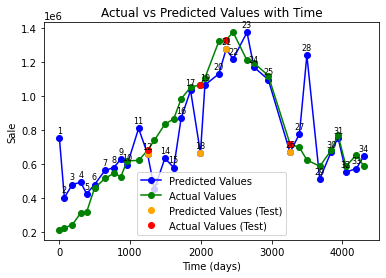

In [18]:
fig, ax = plt.subplots()

ax.plot(time, predictions, label='Predicted Values', marker='o', linestyle='-', color='blue')
ax.plot(time, y, label='Actual Values', marker='o', linestyle='-', color='green')
ax.plot(time_test, predictions_test, label='Predicted Values (Test)', marker='o', linestyle='None', color='orange')
ax.plot(time_test, y_test, label='Actual Values (Test)', marker='o', linestyle='None', color='red')

for i, (t, actual_sale, pred) in enumerate(zip(time, y, predictions)):
    ax.annotate(str(i+1), (t, pred), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    
ax.set_xlabel("Time (days)")
ax.set_ylabel("Sale")
ax.set_title("Actual vs Predicted Values with Time")
ax.legend()
plt.show()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 326)               10758     
                                                                 
 dense_3 (Dense)             (None, 1)                 327       
                                                                 
Total params: 11,757
Trainable params: 11,757
Non-traina

In [20]:
model.save("model.h5")